# This notebook contains the Stacks parameter tests, final scripts used and analyses to identify sex linked markers for the ddRADseq dataset of <i>Rana chensinensis</i> 
## Sample set:

### 2 locations
 - Banqiao village, Qiaozhuang town, Qingchuan county, Sichuan province - <b>18 samples (Banq)</b>  32.6215	105.34776

 - Muyu town, Qingchuan county, Sichuan province - <b>29 samples (Muyu)</b> 32.63548	105.4028

  (About 11km apart)

Samples will be run through Ustacks and Cstacks and Sstacks together, and then separated at the Populations stage.


##Contents of this notebook:

####1. Ustacks parameter tests using a subset of samples
####2. Cstacks parameter tests using a subset of samples
####3. Populations parameter tests (for separate families, using all samples in each family)
####4. Identification of sex-linked markers
####5. Map sex-linked markers to the genome(s). 


In [1]:
%matplotlib inline
import os
import Incremental_U as IncU 
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [2]:
%load_ext rpy2.ipython

##1. Ustacks parameter tests

In [8]:
### Fastq files are here:
Incrememntal_test_directory = "/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Ustacks/"

In [9]:
## INPUT INCREMENTAL TEST PARAMETERS HERE -----------------------------------------

parameters = ["M", "m", "MS"]                   ## List, eg ["M", "m", "MS"]. If only testing 1 param, this must still be a list e.g. ["M"]
M_vals =   [2,3,4,5,6]                          ## List, eg range(1,5,1) this would give [1,2,3,4]
m_vals =   [2,3,4,5,6]                          ## List, eg range(1,5,1) this would give [1,2,3,4]
MS_vals =  [2,3,4]                              ## List, eg range(1,5,1) this would give [1,2,3,4]
threads =  7                                    ## Int. eg 7
parent_dir = Incrememntal_test_directory        ## Absolute Dir containing the demultiplexed raw read fasta/fastq files
run_cline_switch =  1                           ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

print "Analsyses will be performed in %s" % parent_dir

## Making input dictionary --------------------------------------

Setup_dict = {}
Setup_dict["parameters"] = {}
Setup_dict["threads"] = threads
Setup_dict["parent_directory"] = parent_dir
Setup_dict["run_cline_switch"] = run_cline_switch
Setup_dict["verbose"] = False

for param in parameters:
    if "M" in param:
        Setup_dict["parameters"][param] = M_vals
    if "m" in param:
        Setup_dict["parameters"][param] = m_vals
    if "MS" in param:
        Setup_dict["parameters"][param] = MS_vals

#pp = pprint.PrettyPrinter(indent=2)
#pp.pprint(Setup_dict)


Analsyses will be performed in /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Ustacks/



##### ------- Test samples, parameters and values ------ #####

{ 'Rche_146.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Rche_149.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Rche_150.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Rche_152.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Rche_155.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm':

/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


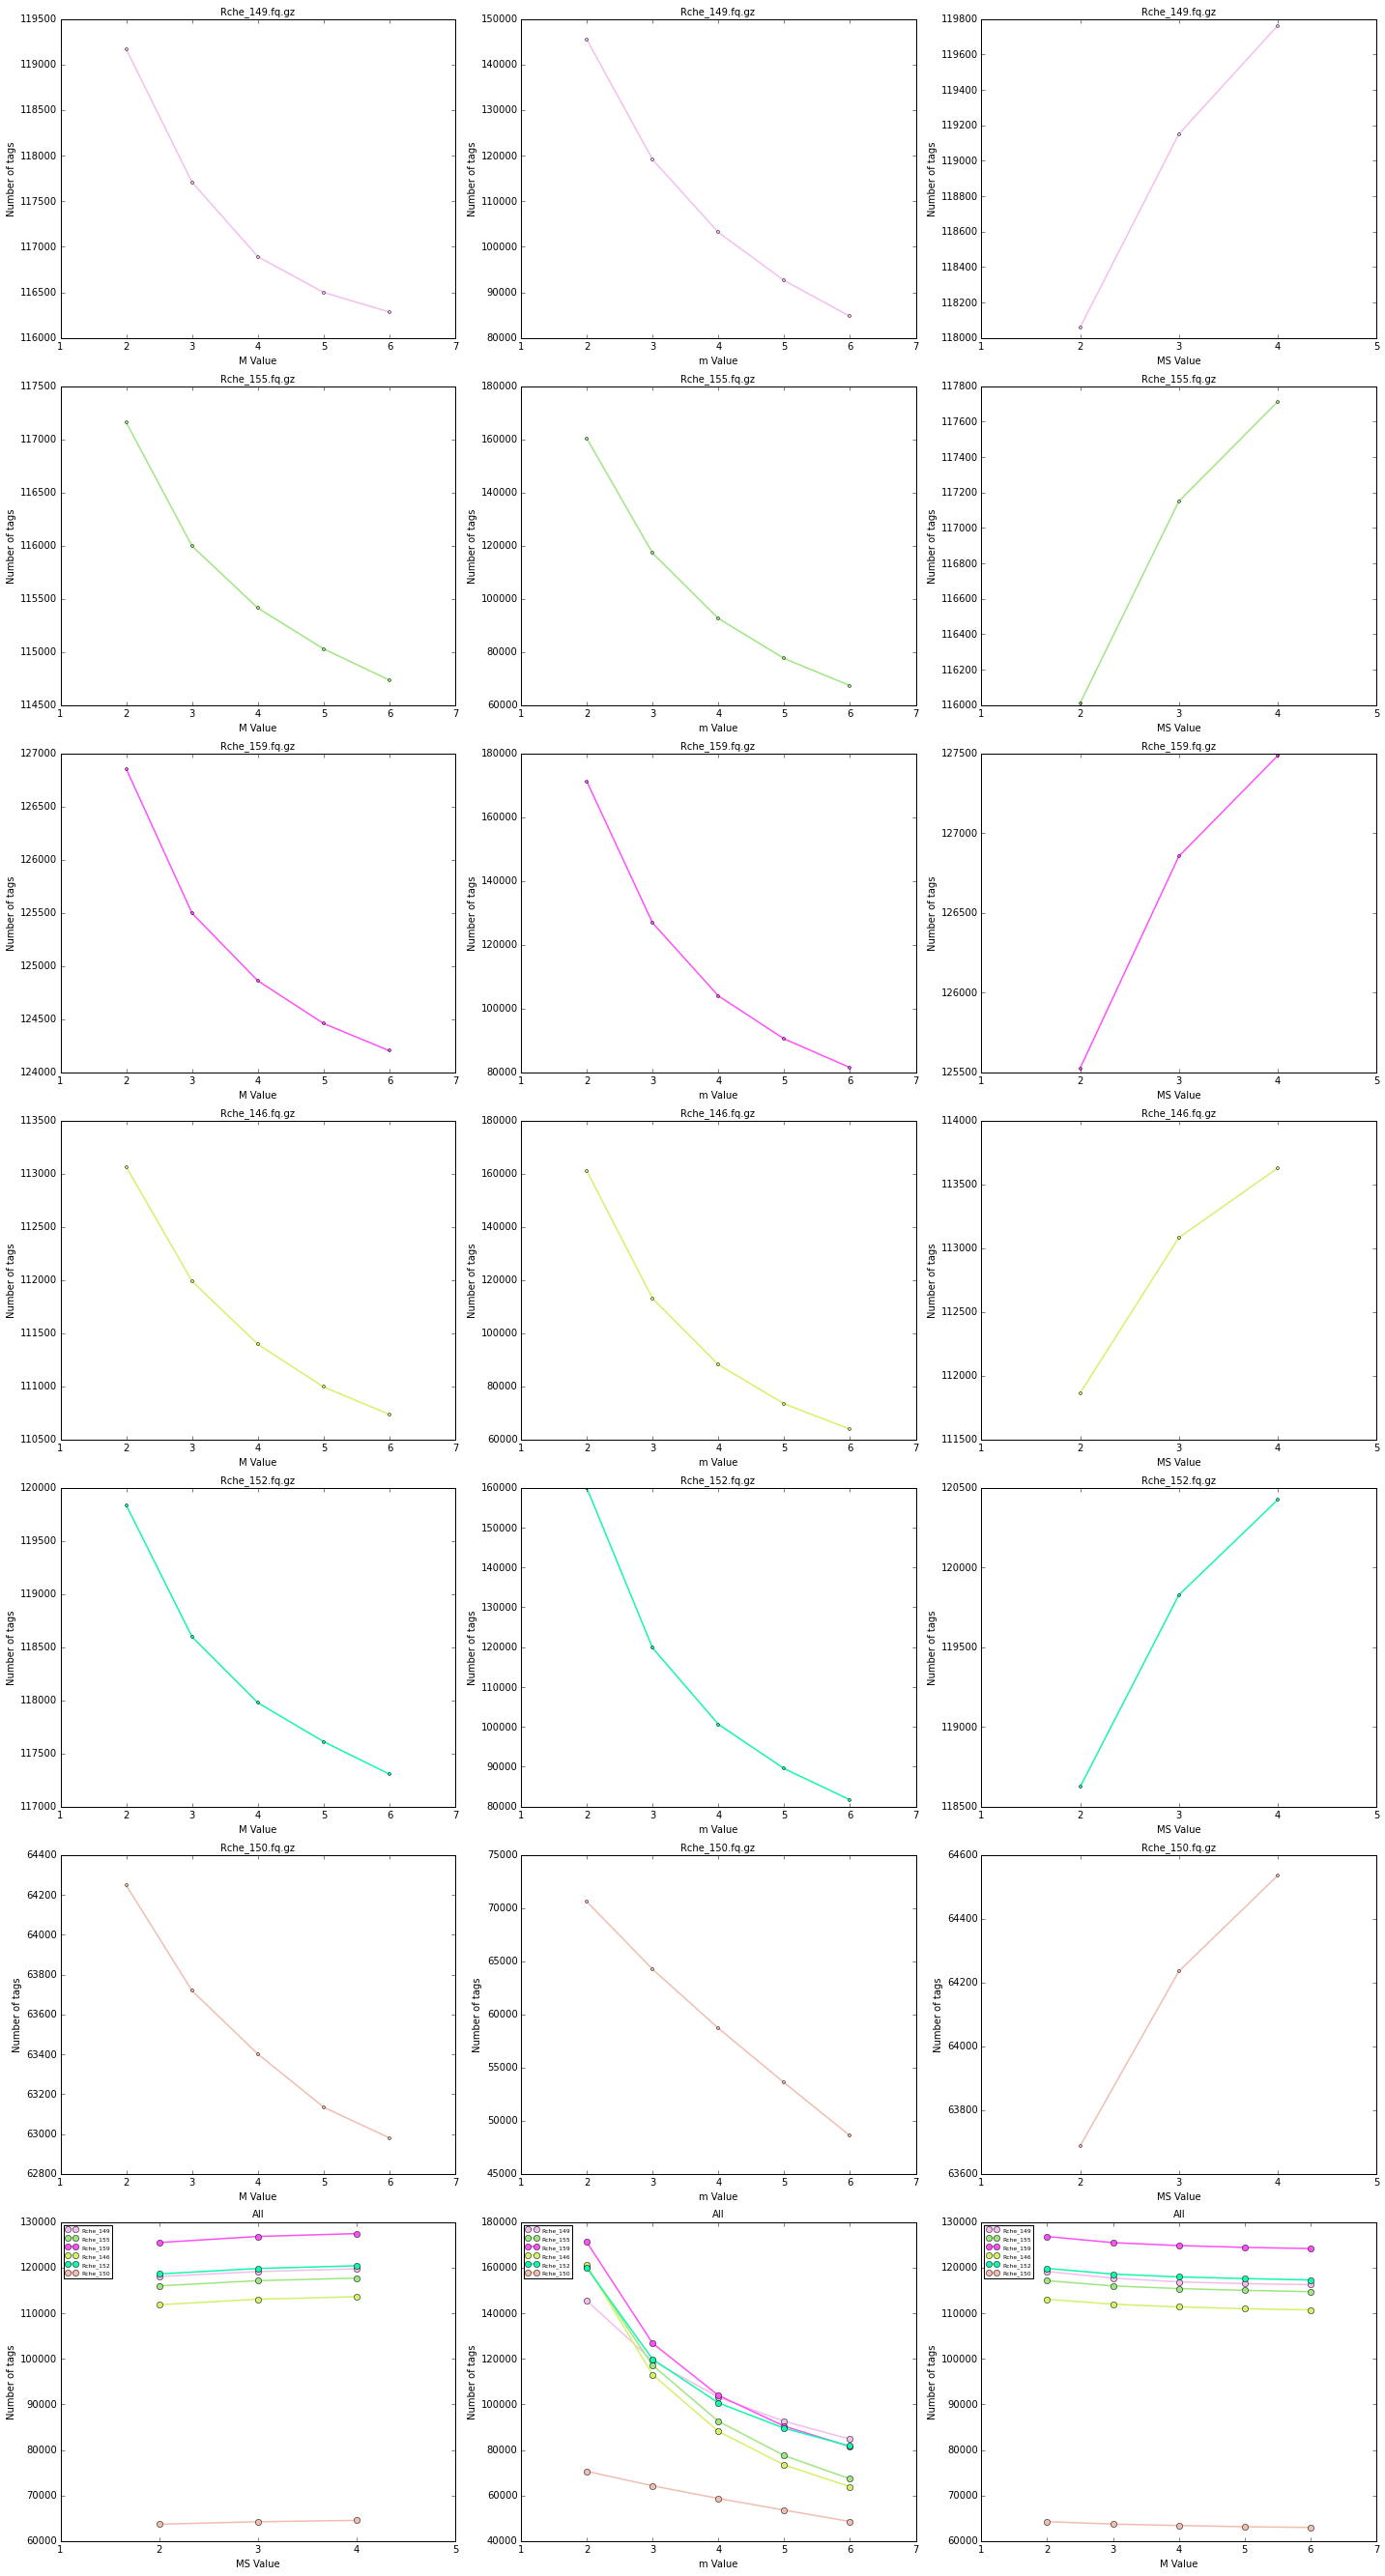

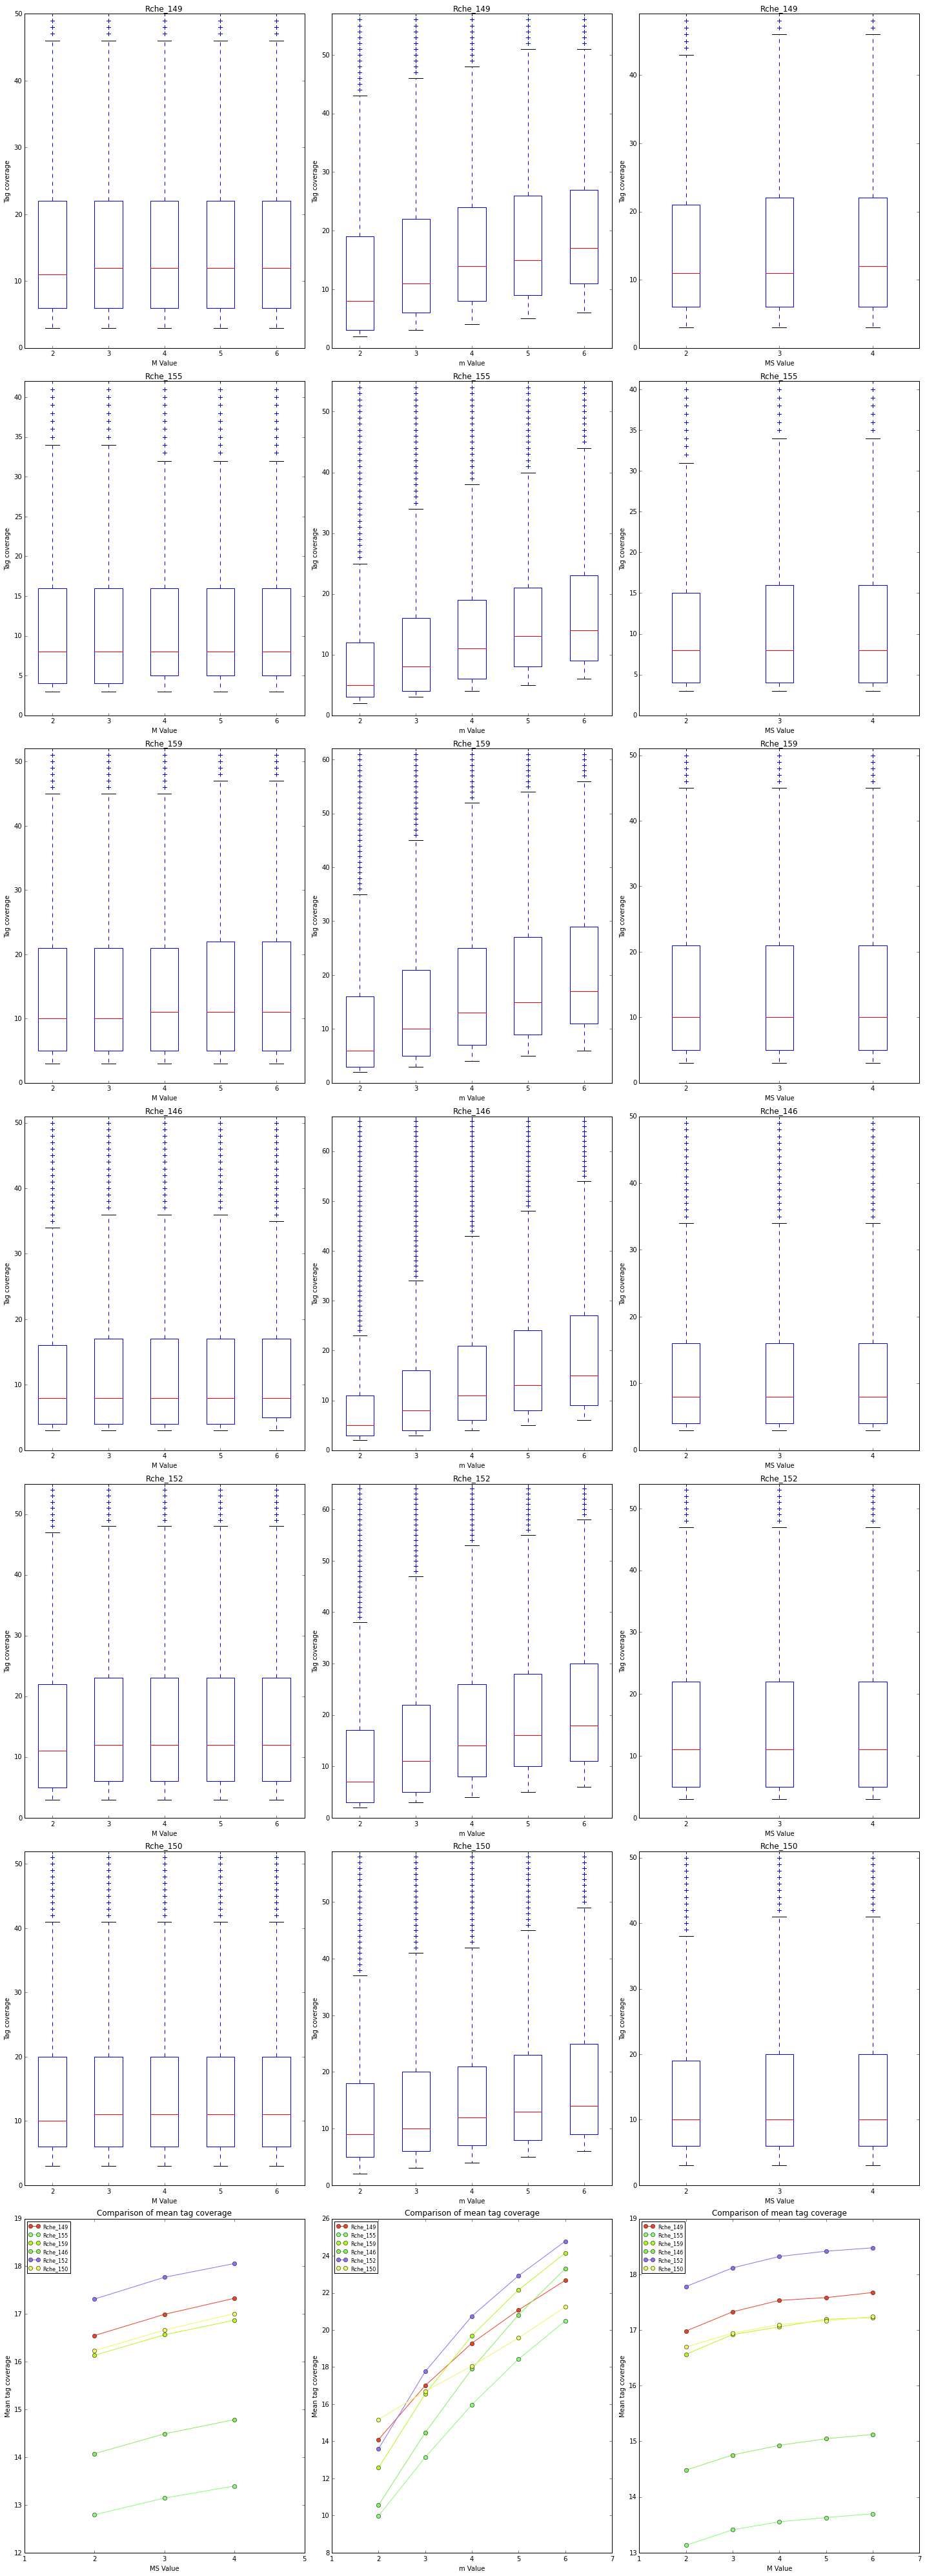

In [10]:
Incremental_U_outputs = IncU.IncreMental_U(Setup_dict)

<b>Final Ustacks commands</b> -------------------------------------------------------------------------------------------------------------------

ustacks -t gzfastq -f SAMPLE.fq.gz -i 1 -m 3 -M 2 -r -d;  



###2. Cstacks tests -------------------------------------------------------------------------------------------------------------------

In [11]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

## Get IDs for the test samples

Parameter_dict = {}
Parameter_dict["Get_IDs"] = True
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks"

IncC.Incremental_C(Parameter_dict)


 ## Sample IDs:

Rche_146, ID = 4
Rche_149, ID = 1
Rche_150, ID = 6
Rche_152, ID = 5
Rche_155, ID = 2
Rche_159, ID = 3


In [12]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

Parameter_dict = {}
Parameter_dict["Get_IDs"] = False
Parameter_dict["batch_ID"] = 1
Parameter_dict["n_vals"] = [1,2,3,4]
Parameter_dict["threads"] = 7
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks"
Parameter_dict["sample_ids"] = [2,6,4]   ## add specific sample ID's of samples you want to look at, if this is not all samples in the directory given above. Leave as empty list if not.
Parameter_dict["run_cline_switch"] = 1     ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(Parameter_dict)

{ 'Get_IDs': False,
  'Ustacks_outs_dir': '/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks',
  'batch_ID': 1,
  'n_vals': [1, 2, 3, 4],
  'run_cline_switch': 1,
  'sample_ids': [2, 6, 4],
  'threads': 7}



### ----- Making and running command lines ----- ###

n value = 1
cstacks -b 1 -n 1 -s /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/Rche_155 -s /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/Rche_150 -s /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/Rche_146 7 -o /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/n_1
Running Command line

n value = 2
cstacks -b 1 -n 2 -s /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/Rche_155 -s /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/Rche_150 -s /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/Rche_146 7 -o /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/n_2
Running Command line

n value = 3
cstacks -b 1 -n 3 -s /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/Rche_155 -s /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/Rche_150 -s /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Cstacks/Rche_146 7 -o /home/dje

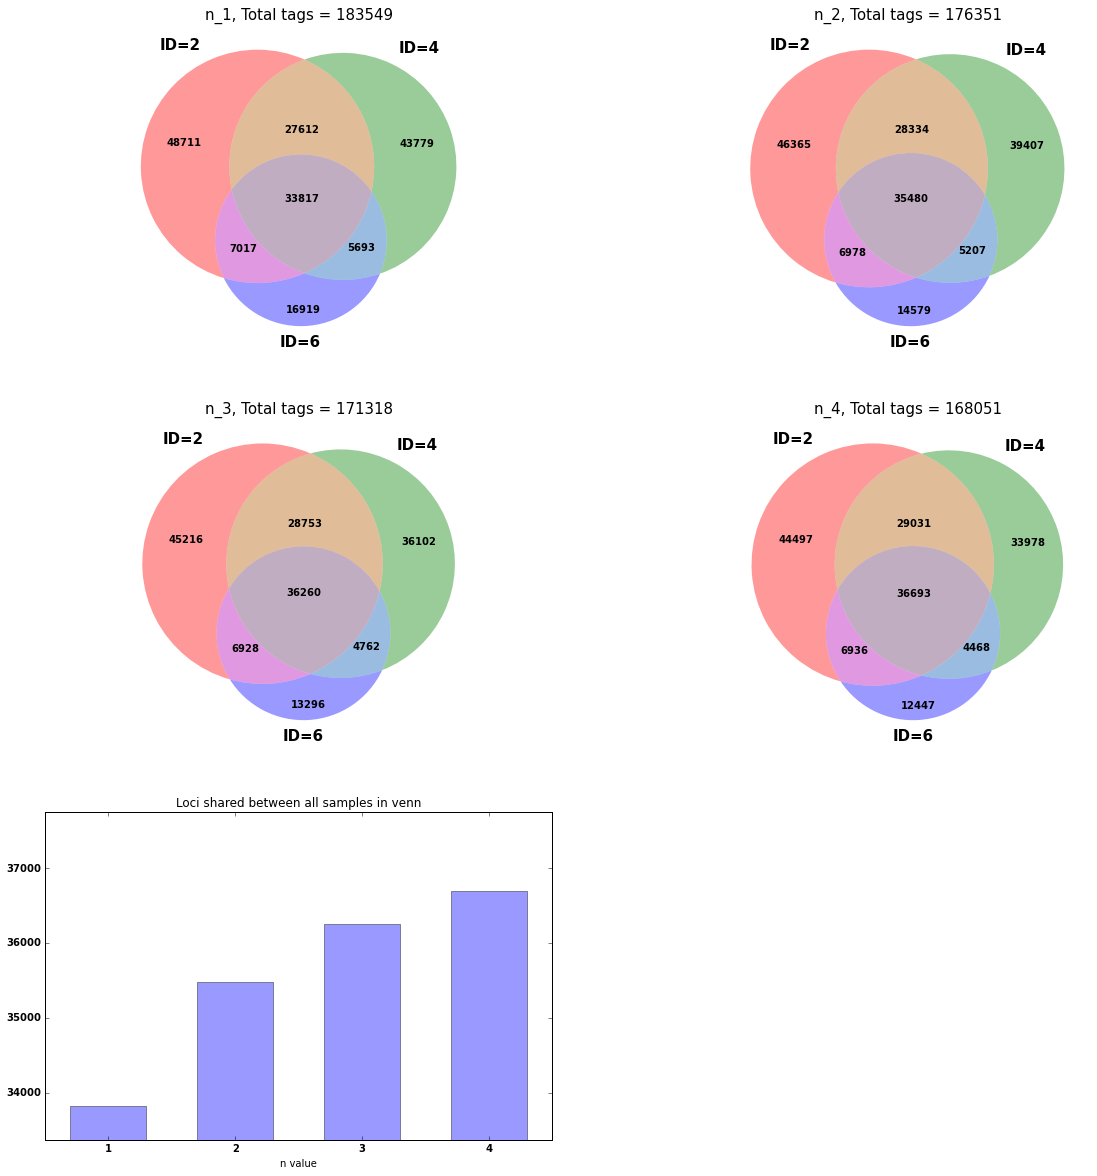

In [13]:
IncC.Incremental_C(Parameter_dict)  

## Note Rche_150 (ID = 6) is not good quality so I expect this sample to share fewer loci than the other two

Indeed Rche_150 has much fewer loci. But in general the sharing is not great between them. However there are a large number of loci so I should still end up with a decent number present in most samples.

<b>Final Cstacks command</b> ----------------------------------------------------------------------------------------------------------------------------

cstacks -b 1 -n2 -p 12  -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_146 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_147 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_148 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_149 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_150 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_152 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_155 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_156 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_157 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_158 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_159 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_160 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_163 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_164 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_165 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_166 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_167 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_168 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_178 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_179 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_180 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_182 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_186 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_187 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_188 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_190 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_194 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_195 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_196 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_197 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_198 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_202 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_203 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_204 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_205 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_206 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_210 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_211 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_212 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_213 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_214 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_218 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_219 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_220 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_221 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/Rche_329 -o /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Rchensinensis/Stacks/


<b> Final Sstacks commands </b> -------------------------------------------------------------------------------------------------------------------------  

sstacks -b 1 -s Rche_146 -c batch_1
sstacks -b 1 -s Rche_147 -c batch_1
sstacks -b 1 -s Rche_148 -c batch_1
sstacks -b 1 -s Rche_149 -c batch_1
sstacks -b 1 -s Rche_150 -c batch_1
sstacks -b 1 -s Rche_152 -c batch_1
sstacks -b 1 -s Rche_155 -c batch_1
sstacks -b 1 -s Rche_156 -c batch_1
sstacks -b 1 -s Rche_157 -c batch_1
sstacks -b 1 -s Rche_158 -c batch_1
sstacks -b 1 -s Rche_159 -c batch_1
sstacks -b 1 -s Rche_160 -c batch_1
sstacks -b 1 -s Rche_163 -c batch_1
sstacks -b 1 -s Rche_164 -c batch_1
sstacks -b 1 -s Rche_165 -c batch_1
sstacks -b 1 -s Rche_166 -c batch_1
sstacks -b 1 -s Rche_167 -c batch_1
sstacks -b 1 -s Rche_168 -c batch_1
sstacks -b 1 -s Rche_178 -c batch_1
sstacks -b 1 -s Rche_179 -c batch_1
sstacks -b 1 -s Rche_180 -c batch_1
sstacks -b 1 -s Rche_182 -c batch_1
sstacks -b 1 -s Rche_186 -c batch_1
sstacks -b 1 -s Rche_187 -c batch_1
sstacks -b 1 -s Rche_188 -c batch_1
sstacks -b 1 -s Rche_190 -c batch_1
sstacks -b 1 -s Rche_194 -c batch_1
sstacks -b 1 -s Rche_195 -c batch_1
sstacks -b 1 -s Rche_196 -c batch_1
sstacks -b 1 -s Rche_197 -c batch_1
sstacks -b 1 -s Rche_198 -c batch_1
sstacks -b 1 -s Rche_202 -c batch_1
sstacks -b 1 -s Rche_203 -c batch_1
sstacks -b 1 -s Rche_204 -c batch_1
sstacks -b 1 -s Rche_205 -c batch_1
sstacks -b 1 -s Rche_206 -c batch_1
sstacks -b 1 -s Rche_210 -c batch_1
sstacks -b 1 -s Rche_211 -c batch_1
sstacks -b 1 -s Rche_212 -c batch_1
sstacks -b 1 -s Rche_213 -c batch_1
sstacks -b 1 -s Rche_214 -c batch_1
sstacks -b 1 -s Rche_218 -c batch_1
sstacks -b 1 -s Rche_219 -c batch_1
sstacks -b 1 -s Rche_220 -c batch_1
sstacks -b 1 -s Rche_221 -c batch_1
sstacks -b 1 -s Rche_329 -c batch_1

###3. Populations tests  -----------------------------------------------------------------------------------------------------------------

First, I am using relaxed sample filtering criteria (i.e. the constraints on number of samples a locus must be present in are loose). This will allow me to look at which samples are responsible for a lot of locus dropout. If some samples are particularly bad they can be removed and the dataset will likely be better off.

<b> relaxed populations command </b>

populations -b1 -M popmap.txt -P ./ -r 0.5 -p 1 --vcf -t 12 > Populations_relaxed.log 2>&1 & 

Running populations like this means that a locus has to be present in at least half the samples in at least 1 sex. We will have to be more strict with the final dataset. 

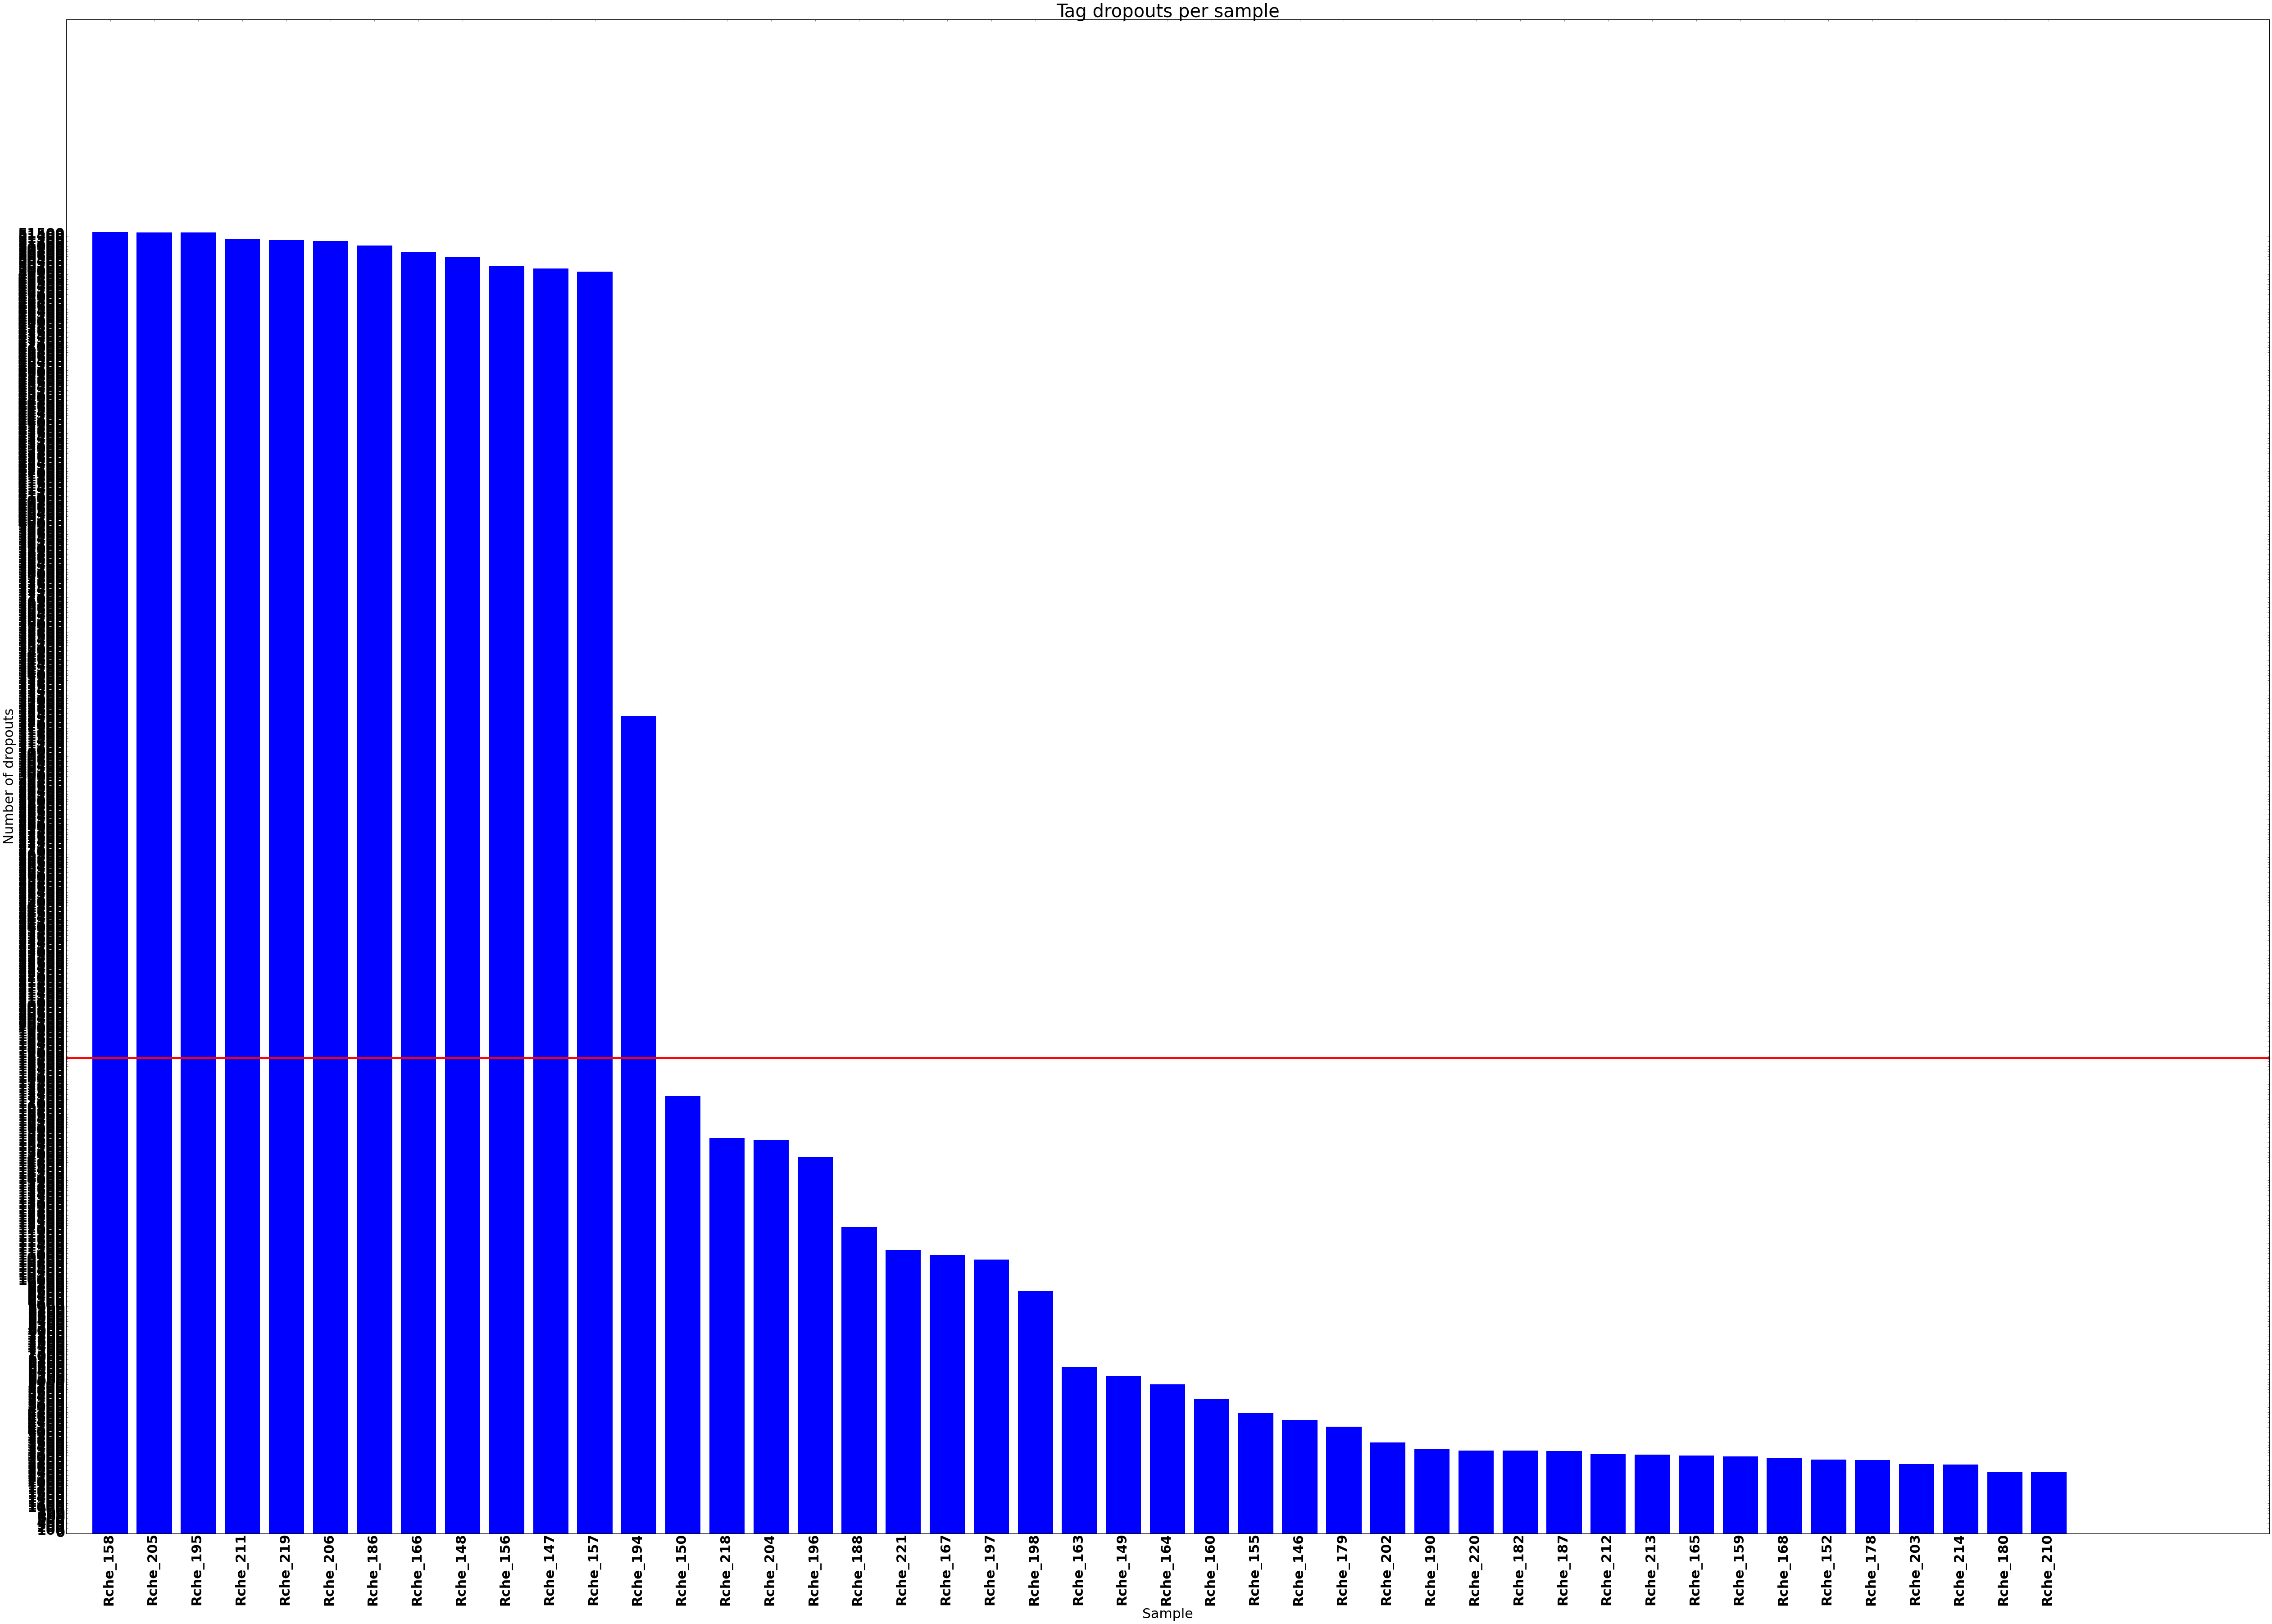

Outputs written to:
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/blacklist.txt


In [14]:
wd = "/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs"

blacklist = MISC.missing_data_finder("%s/batch_1_relaxed.vcf" % wd, wd)

So there are clearly some vry bad qualit samples here. I will remove all above the red line in the above plot. There may still be some bad samples left but there are a lot to begin with so I should be able to remove quite a few and still have a good number.

Samples removed:

Rche_158  
Rche_205  
Rche_195  
Rche_194  
Rche_211  
Rche_219  
Rche_206  
Rche_186  
Rche_166  
Rche_148  
Rche_156  
Rche_147  
Rche_157  

And now run the populations module using strict parameters

    populations -b1 -P ./ -M popmap.txt -r 0.75 -p 2 --vcf -t 8 > Populations_strict_kept1.log 2>&1 &



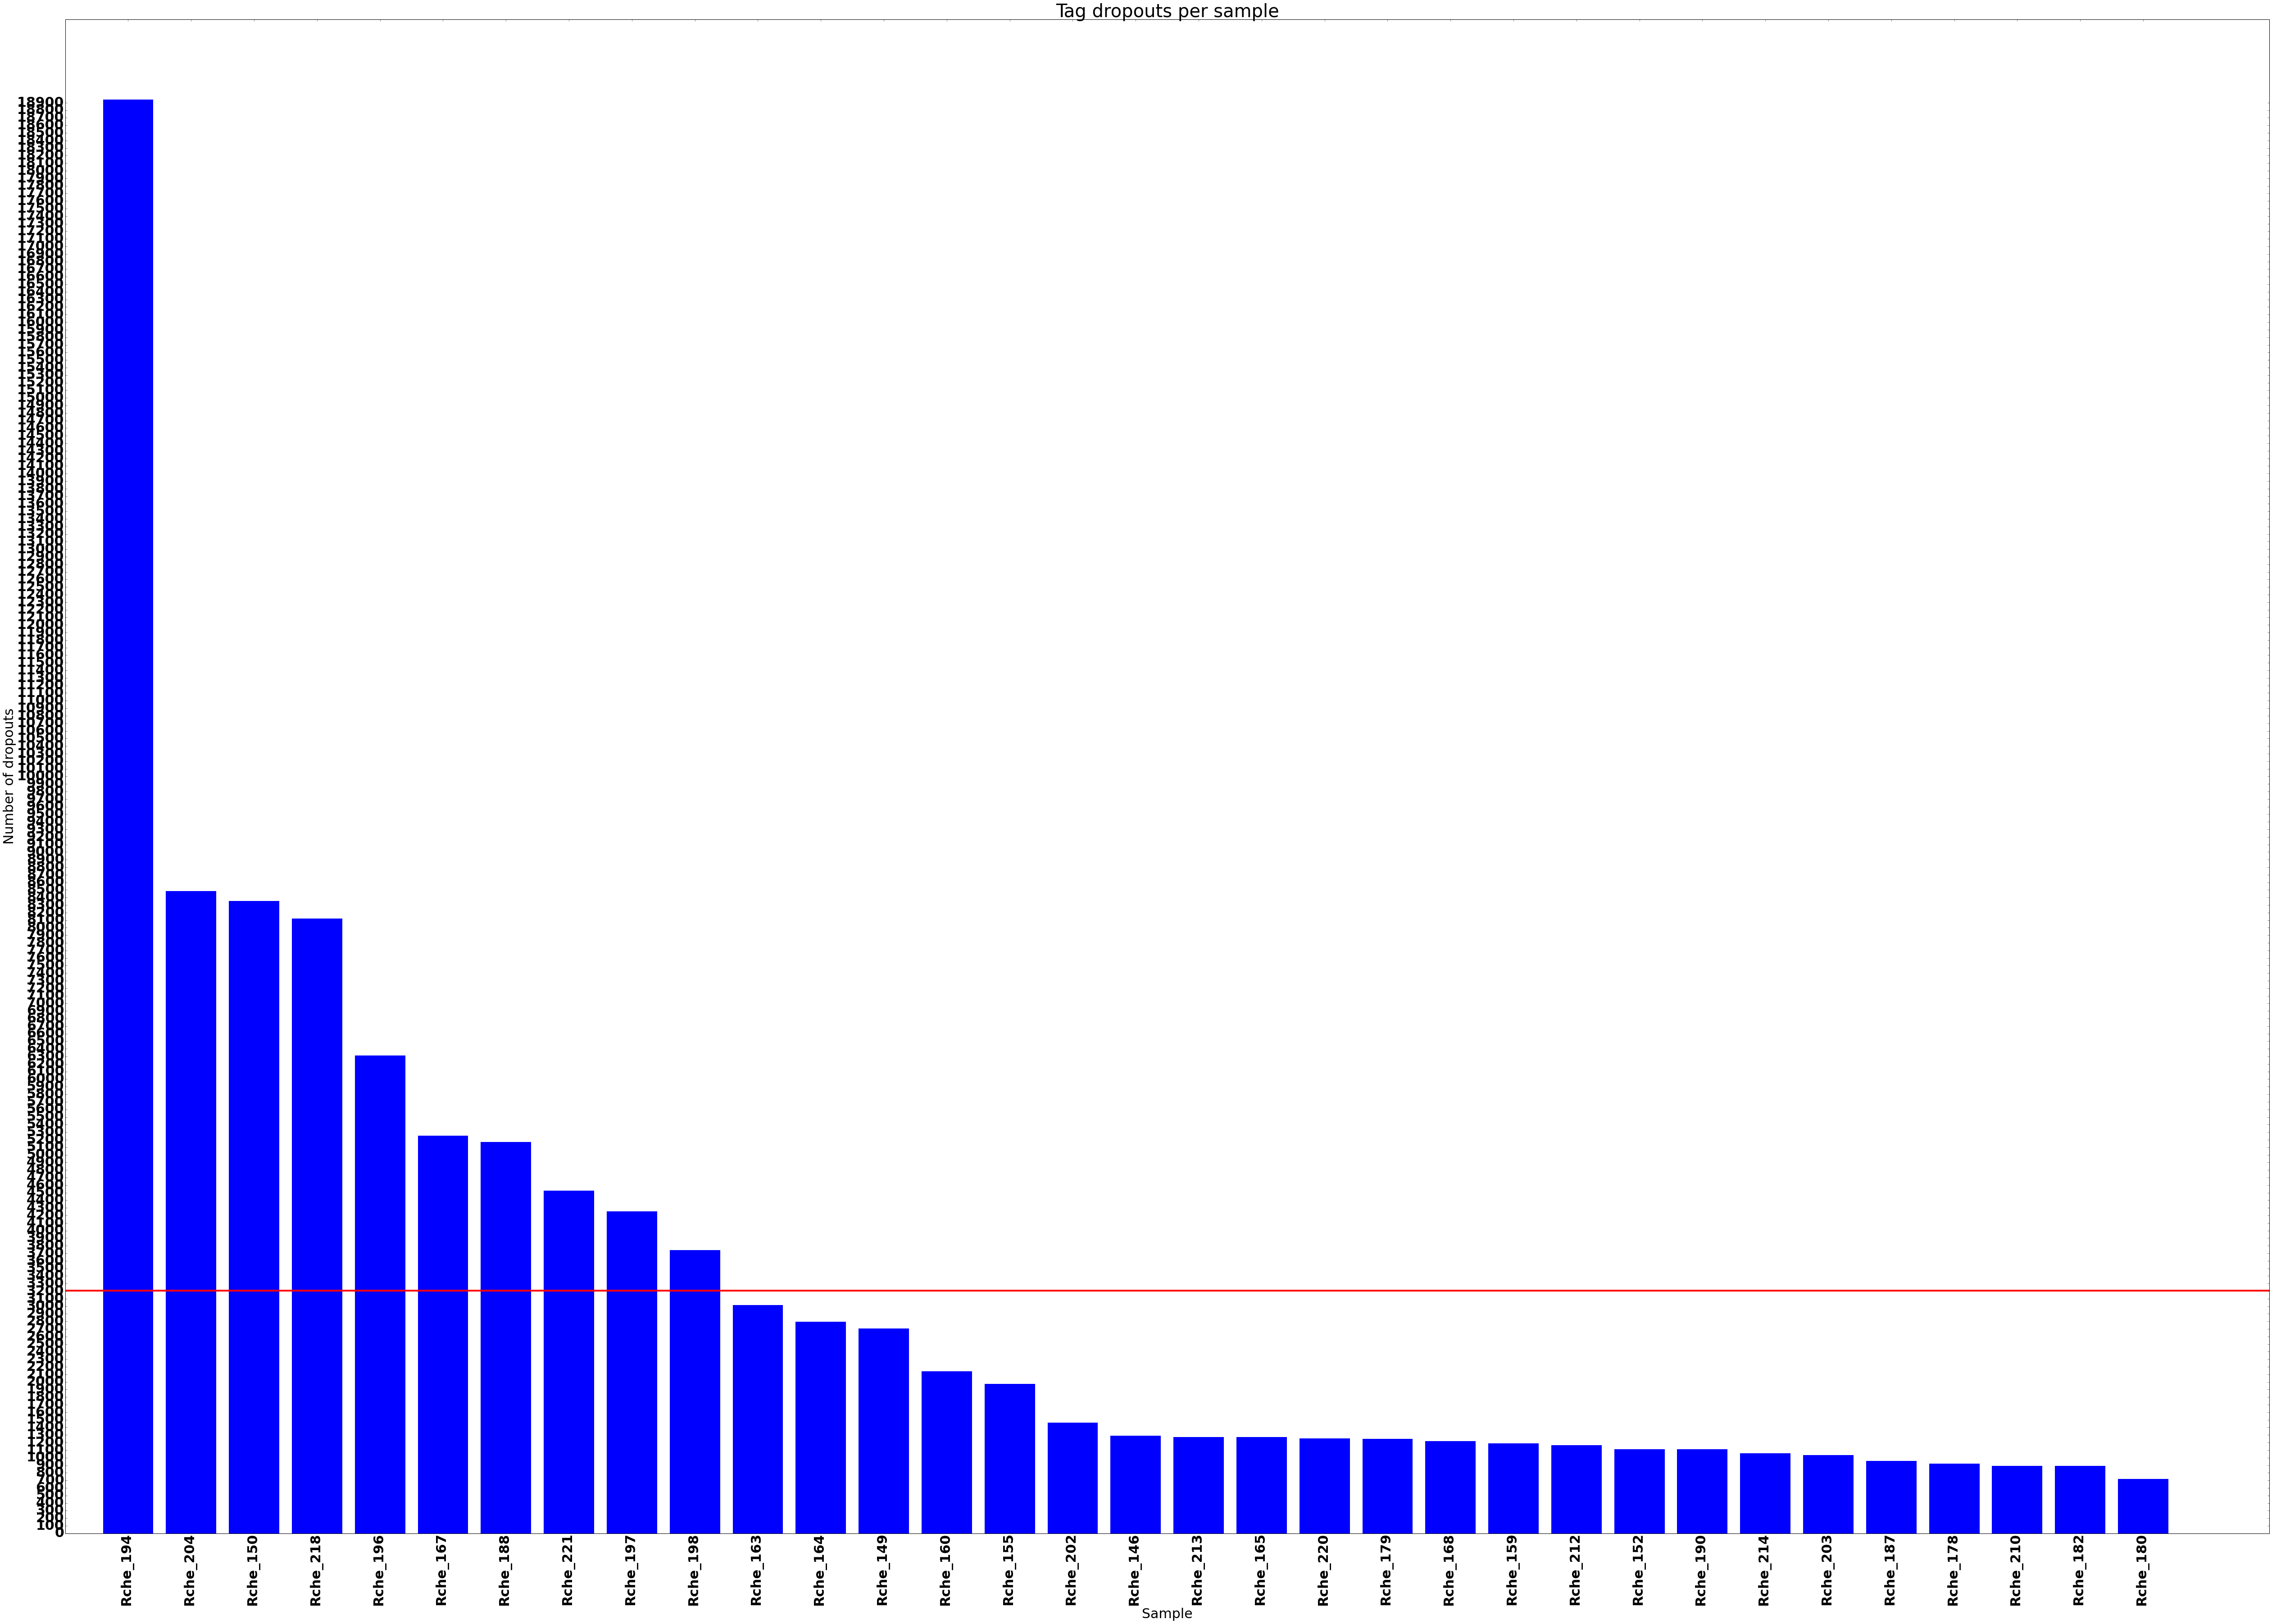

Outputs written to:
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/sample_set_tests//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/sample_set_tests//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/sample_set_tests//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/sample_set_tests//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/sample_set_tests//blacklist.txt


In [15]:
wd = "/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/relaxed_populations_outs/sample_set_tests/"

blacklist = MISC.missing_data_finder("%s/batch_1_strict_kept_1.vcf" % wd, wd)

This retained 33983 samples. And resulted in 39810 SNPs 

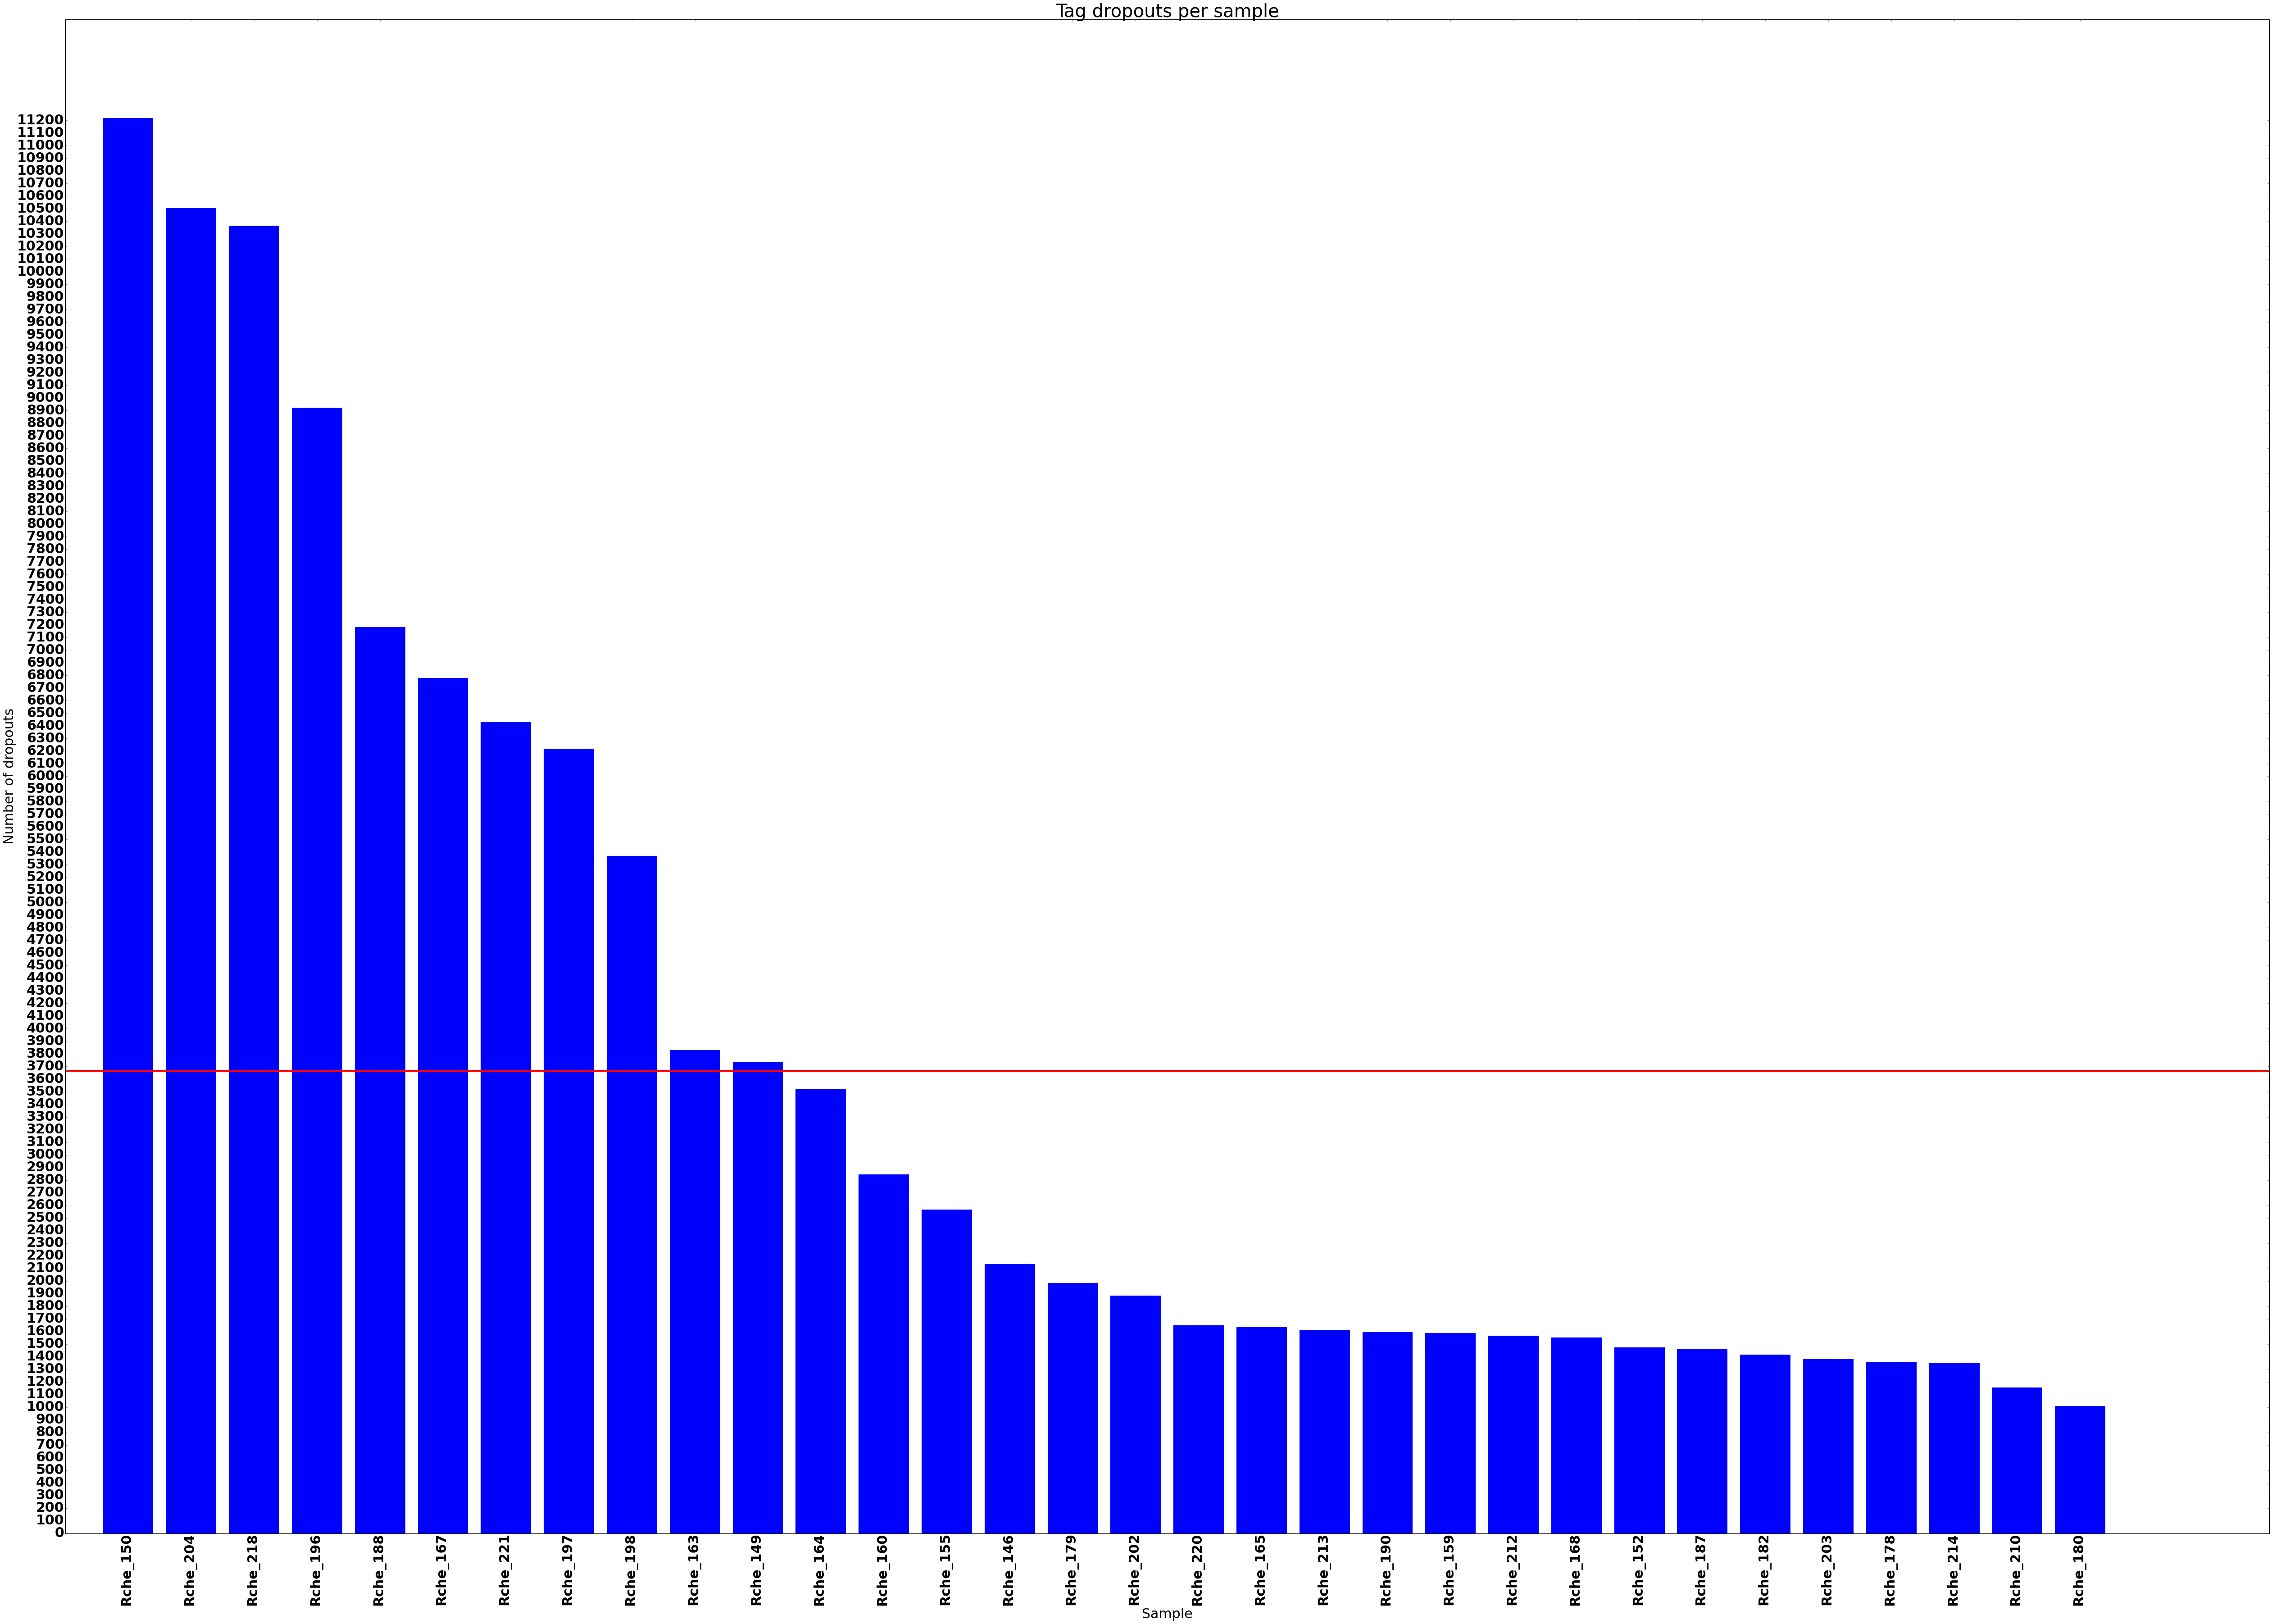

Outputs written to:
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs//blacklist.txt


In [18]:
wd = "/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)


Think about removing further samples:

Rche_150  
Rche_218  
Rche_204  
Rche_196  
Rche_188  
Rche_221  
Rche_167  
Rche_197  
Rche_198  

### Now run a PCA using all loci to look at the (mostly) neutral structure in the data

In [27]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs//batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/

In [28]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/strict_populations_outs/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 




 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



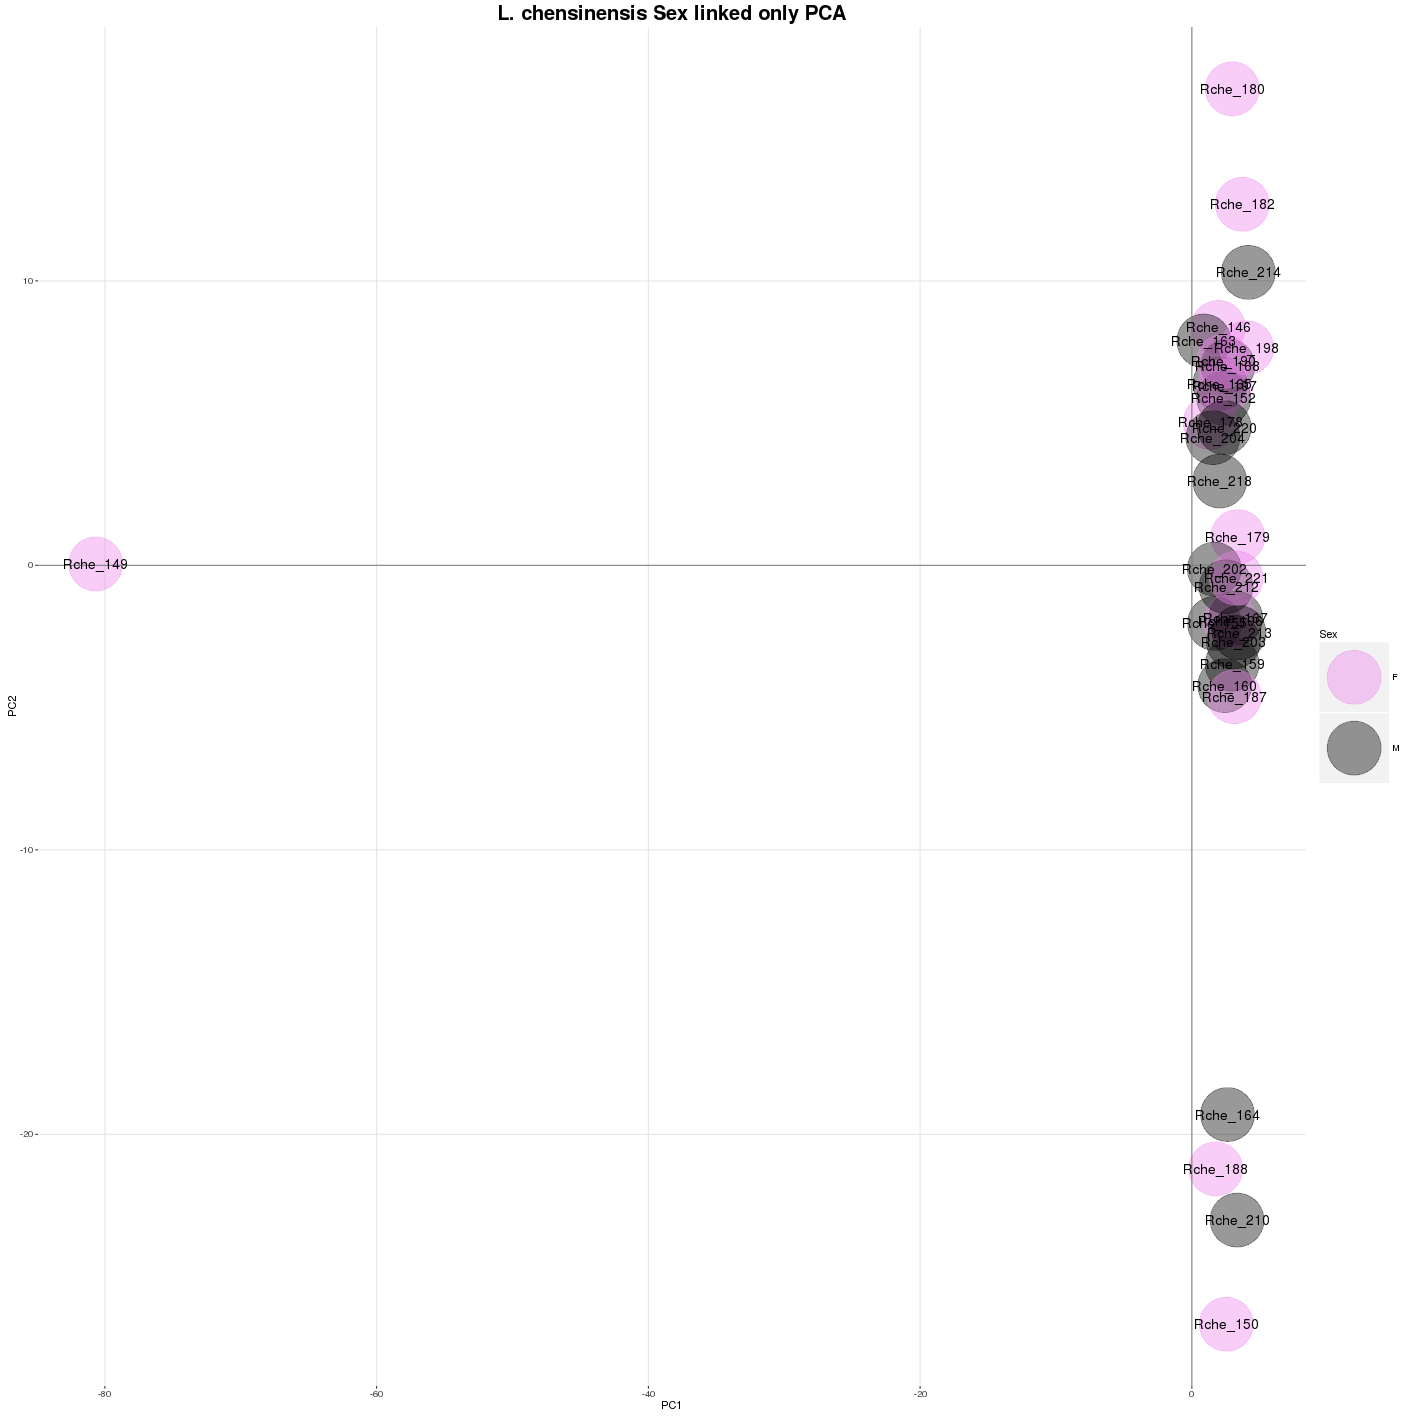

In [29]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. chensinensis Sex linked only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

So there is a bit of stucture here. Which I will remove before going further by removing these samples.

Removed:  
Rche_164  
Rche_188  
Rche_210  
Rche_150  
Rche_149    

### Now find sex linked markers using the 3 approaches in Brelsford & Lavanchy et al (2016)

In [34]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/Final_snp_dataset/batch_1_strict_kept_2.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations/Final_snp_dataset/Sex_ID_info_kept_2.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 35754
Number of samples = 27
Number of loci with too few samples = 0
Number of loci with low MAF = 12973
Number of loci with enough data = 22780
Number of putative X linked snps = 9
Number of putative X linked tags = 7
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


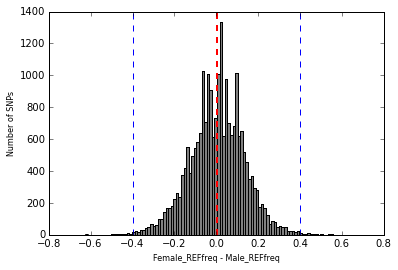


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 35754
Number of samples = 27
Number of loci with too few samples = 0
Number of loci with low MAF = 12973
Number of loci with enough data = 22780
Number of putative X linked snps = 4
Number of putative X linked tags = 4
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 11
Number of males: 16
Number of Putative Y linked tags: 19
Number of Putative W linked tags: 0

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 30
Final number of ZW tags = 0
Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rchensinensis/Incremental/Populations


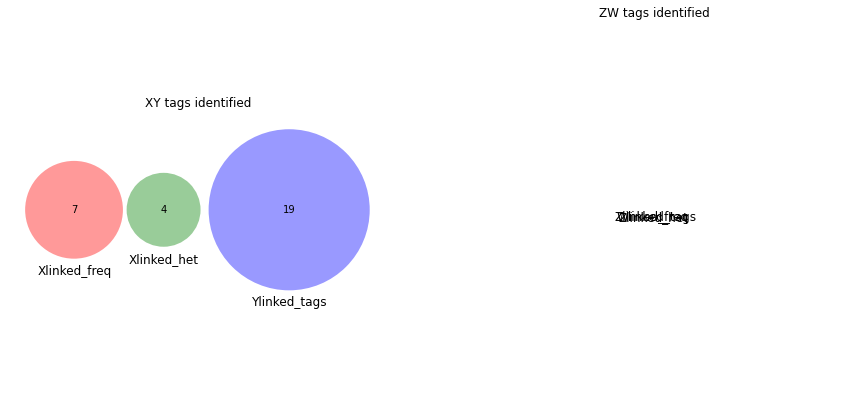

In [35]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

When using strict sex linkage parameters, there are only 22 sex linked markers identified. However when using 0.9, there are many more (>100). This could be caused by sample mis-assignment. So I will try the good old PCA approach, and see if this sheds light on things.

In [36]:
MISC.filter_vcf(Parameter_dict['VCF'], XYset, "XY_linked_snps.vcf") ## Function to filter a vcf

In [45]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1_strict_kept_2.vcf > $wd/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink

## XY linked data only
sed 's/_/-/g' $wd/XY_linked_snps.vcf > $wd/XY_linked_snps_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_altered.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_altered_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/batch_1_altered_adegenet_plink-temporary.fam
written.
35754 variants loaded from .bim file.
27 people (0 males, 0 females, 27 ambiguous) loaded from 

In [47]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/") 

## All SNPs 
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex linked SNPs only
XY_linked_data <- read.PLINK('XY_linked_snps_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("pop_map_kept_2.txt", header = F)

## Running PCAs ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 

pca2 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



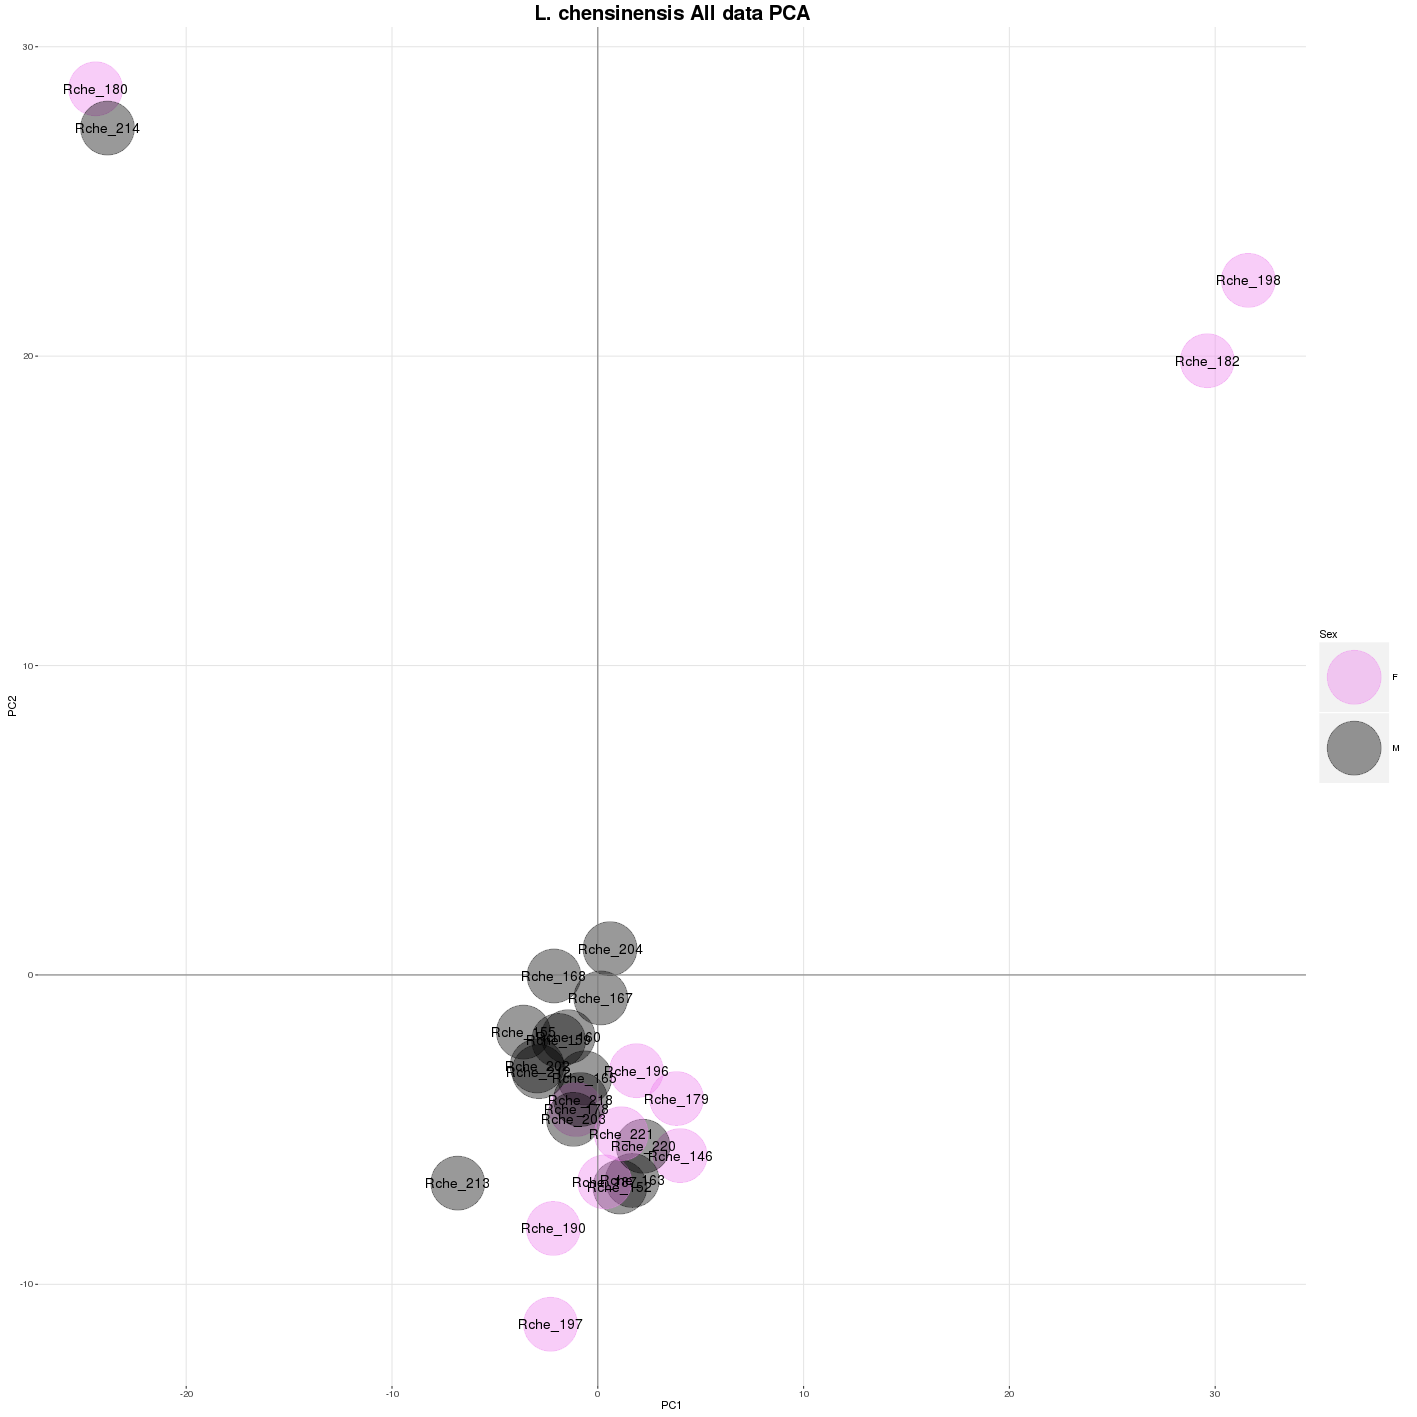

In [48]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. chensinensis All data PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

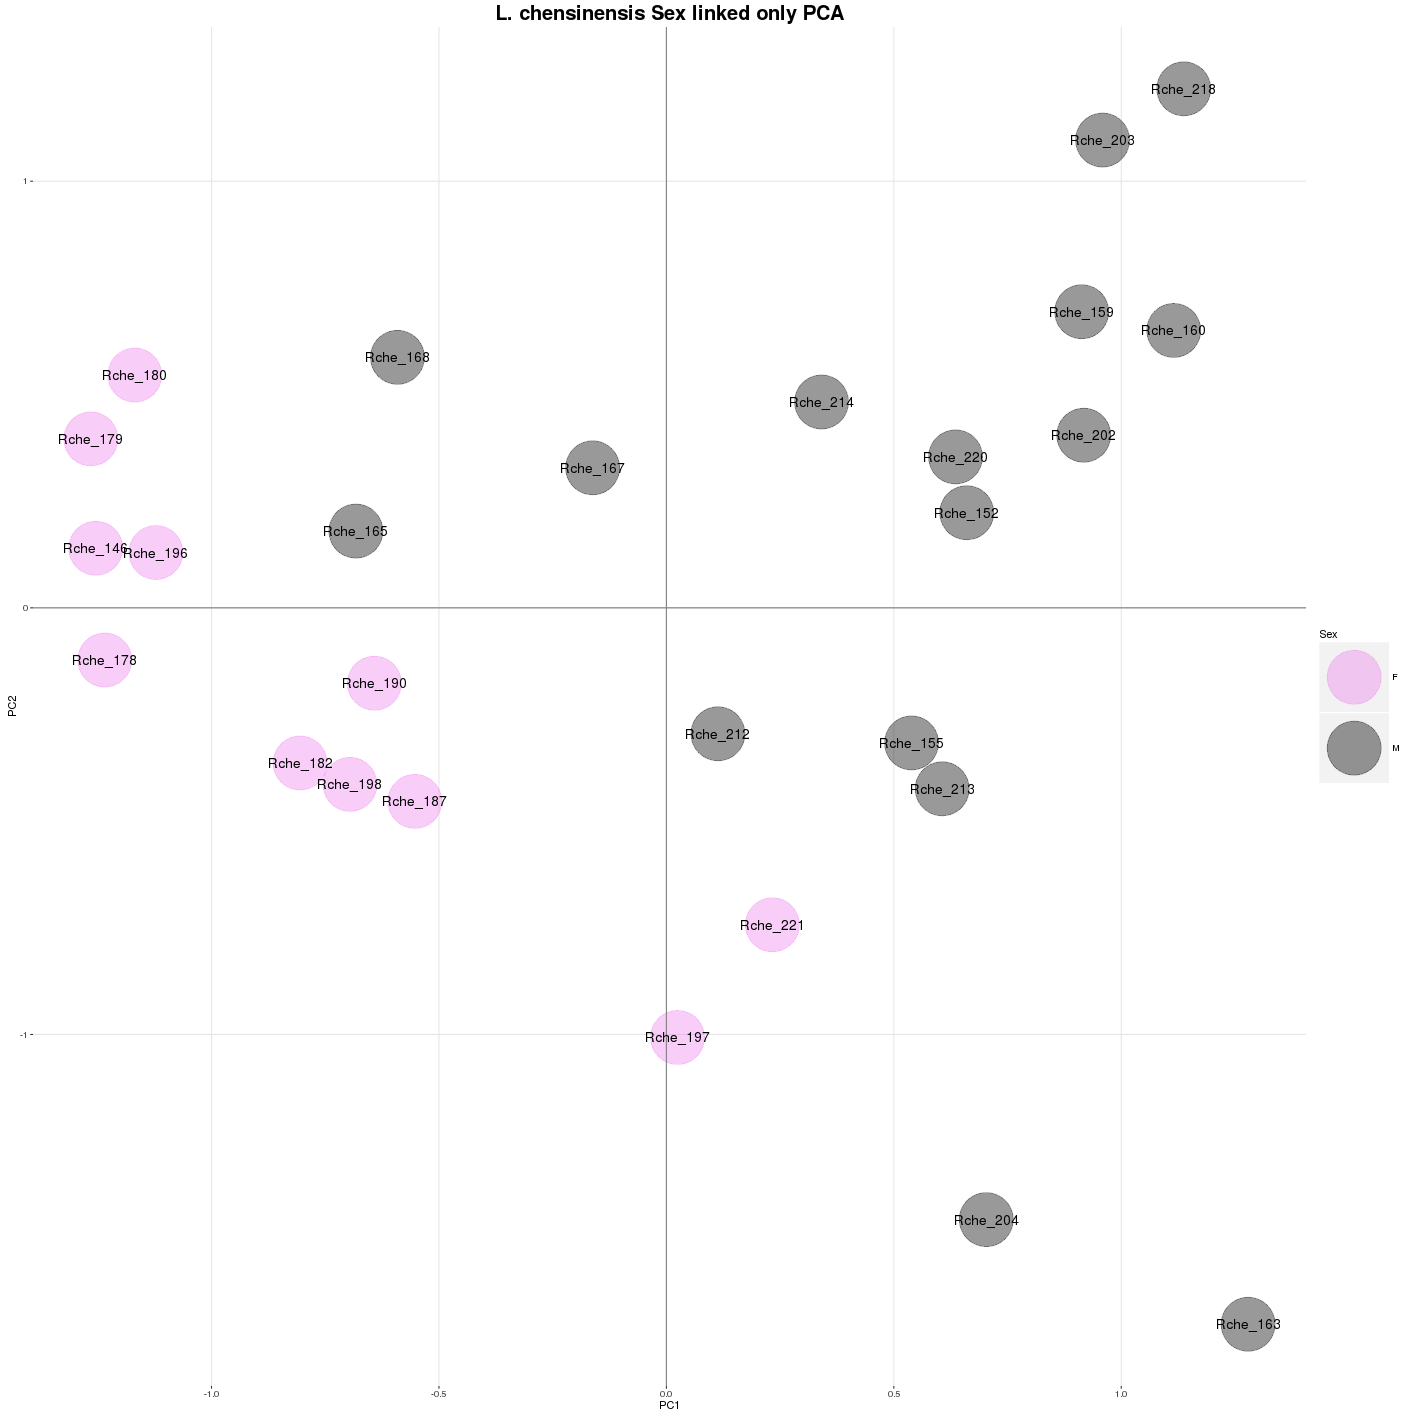

In [53]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. chensinensis Sex linked only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

### Looking at 197 and 221, they fall close to or within the cluster of Males on PC1,2,3. Perhaps misassigned?

Try looking for SL markers again without these two. Also going to remove the four samples that are outliers in the "All_data" plot above.

Removed futher samples:
- Rche_197  
- Rche_221  
- Rche_180  
- Rche_214  
- Rche_198  
- Rche_182  

Number of tags =  33994
Average tag coverage 23.4124061109 (+- 16.3350816445 )


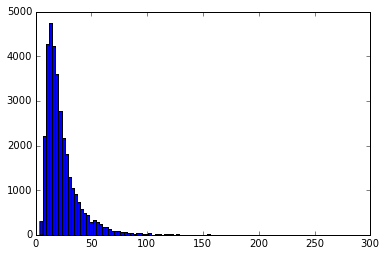

In [2]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Rchensinensis/Sex_linked_markers"
final_vcf = "%s/batch_1_strict_kept_3.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [76]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/batch_1_strict_kept_3.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/Sex_ID_info_kept_3.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.7 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.7 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 33994
Number of samples = 21
Number of loci with too few samples = 0
Number of loci with low MAF = 9637
Number of loci with enough data = 24356
Number of putative X linked snps = 64
Number of putative X linked tags = 55
Number of putative Z linked markers = 17
Number of putative Z linked tags = 13


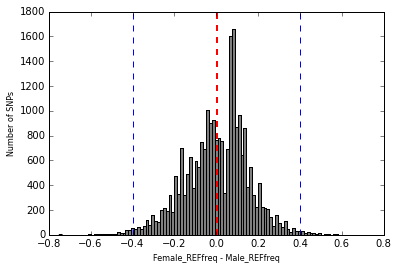


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 33994
Number of samples = 21
Number of loci with too few samples = 0
Number of loci with low MAF = 9637
Number of loci with enough data = 24356
Number of putative X linked snps = 6
Number of putative X linked tags = 6
Number of putative Z linked markers = 2
Number of putative Z linked tags = 2

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 6
Number of males: 15
Number of Putative Y linked tags: 8
Number of Putative W linked tags: 0

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 66
Final number of ZW tags = 14
Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset


/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:60: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


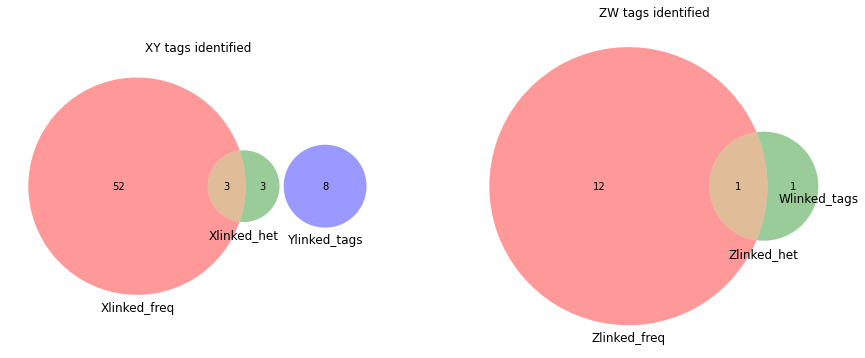

In [77]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

In [63]:
MISC.filter_vcf(Parameter_dict['VCF'], XYset, "XY_linked_snps.vcf") ## Function to filter a vcf

In [64]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1_strict_kept_3.vcf > $wd/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink

## XY linked data only
sed 's/_/-/g' $wd/XY_linked_snps.vcf > $wd/XY_linked_snps_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_altered.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_altered_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//batch_1_altered_adegenet_plink-temporary.fam
written.
33994 variants loaded from .bim file.
21 people (0 males, 0 females, 21 ambiguous) loaded

In [65]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/") 

## All SNPs 
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex linked SNPs only
XY_linked_data <- read.PLINK('XY_linked_snps_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:

sexes <- read.delim("pop_map_kept_3.txt", header = F)

## Running PCAs ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 

pca2 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



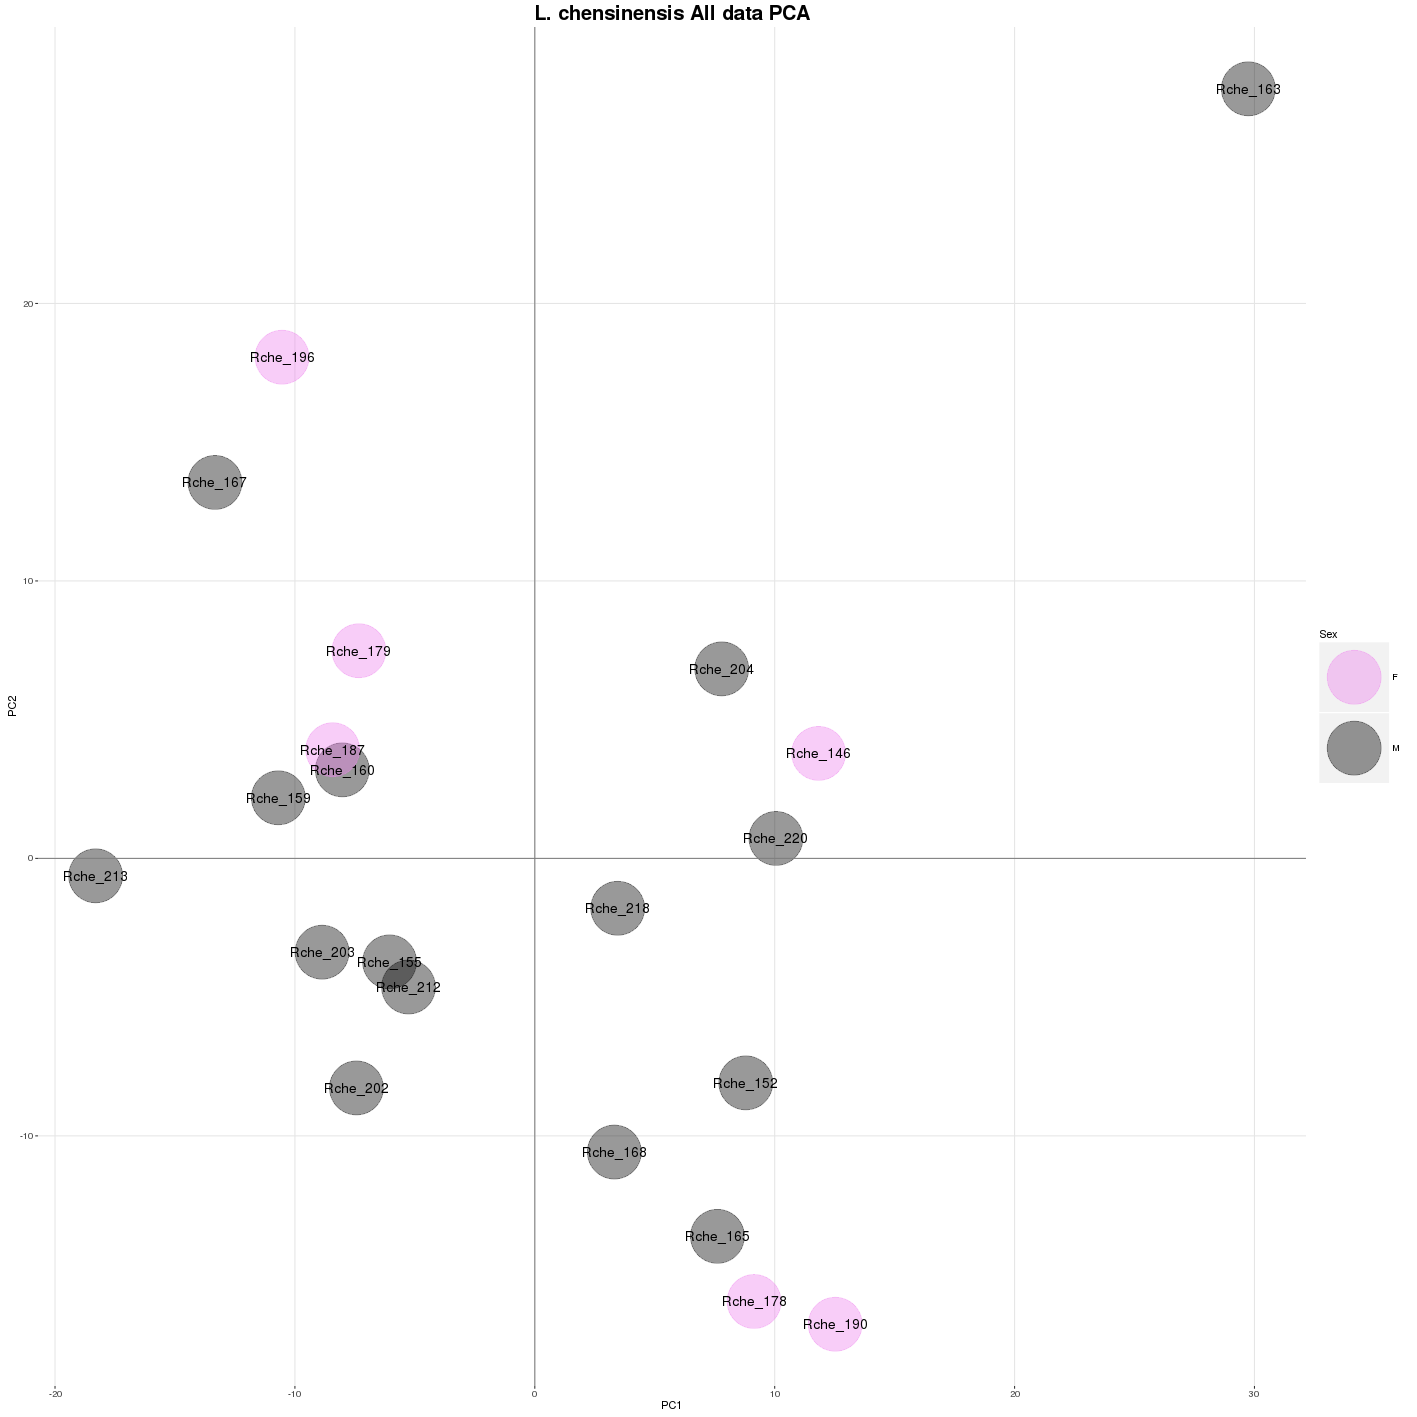

In [67]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. chensinensis All data PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

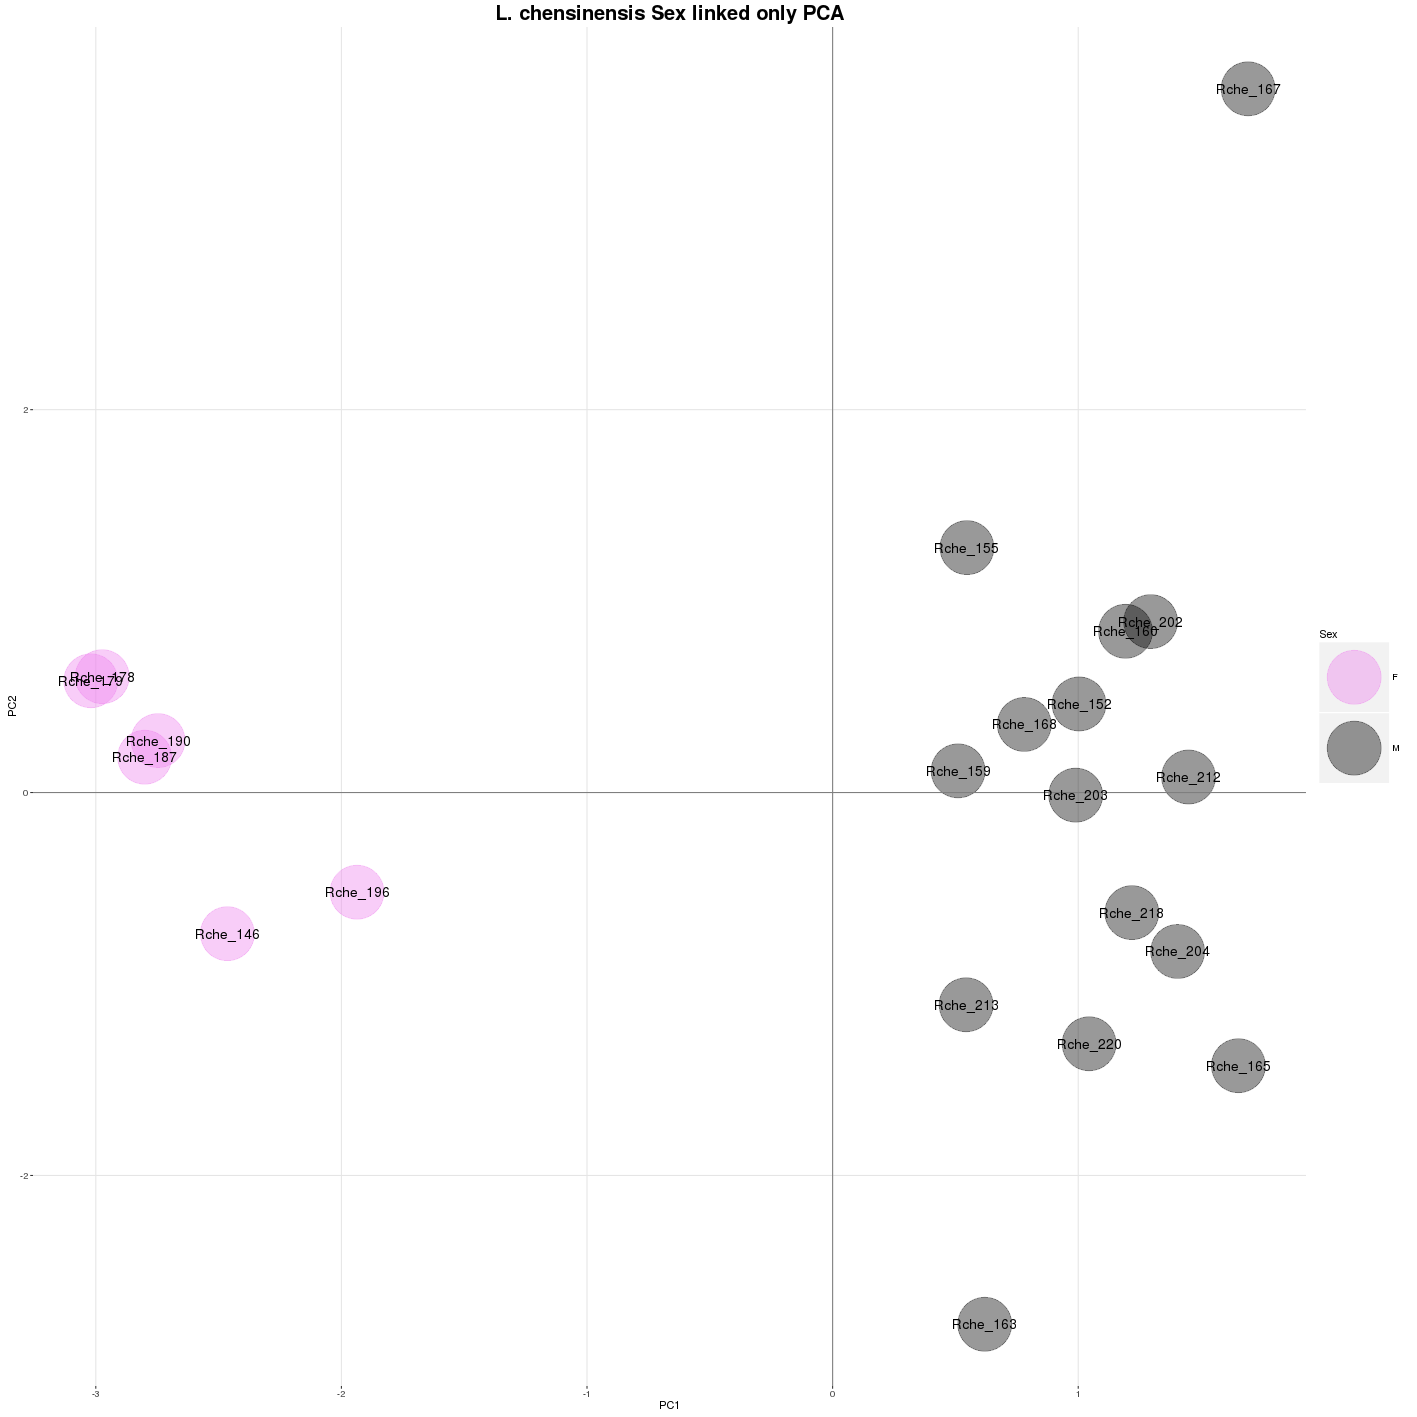

In [68]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. chensinensis Sex linked only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

Ok, so now I have a set of loci that I am reasonably confident are sex linked (both because of the separation between the sampels and the jump in the number of the Y specific markers in this subset. 

Now I will go back to the dataset containing all of the good samples, and plot them using these putatively identified sex linked markers to see what things look like.

In [72]:
old_vcf = "/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/batch_1_strict_kept_2.vcf"

MISC.filter_vcf(old_vcf, XYset, "XY_linked_snps_kept_2.vcf") ## Function to filter a vcf

In [73]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/  ## just change this line

## XY linked data only
sed 's/_/-/g' $wd/XY_linked_snps_kept_2.vcf > $wd/XY_linked_snps_altered_kept_2.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_altered_kept_2.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_altered__kept_2_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//XY_linked_snps_altered__kept_2_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//XY_linked_snps_altered__kept_2_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//XY_linked_snps_altered_kept_2.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//XY_linked_snps_altered__kept_2_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//XY_linked_snps_altered__kept_2_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset//XY_linked_snps_altered__kept_2_plink-temporary.fam
written.
94 variants loaded from .bim file.
27 people (0 males,

In [74]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rchensinensis/Final_snp_dataset/") 
#
## Sex linked SNPs only
XY_linked_data <- read.PLINK('XY_linked_snps_altered__kept_2_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:

sexes <- read.delim("pop_map_kept_2.txt", header = F)

## Running PCAs ---------------------------------------------------------------------------------------

pca3 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



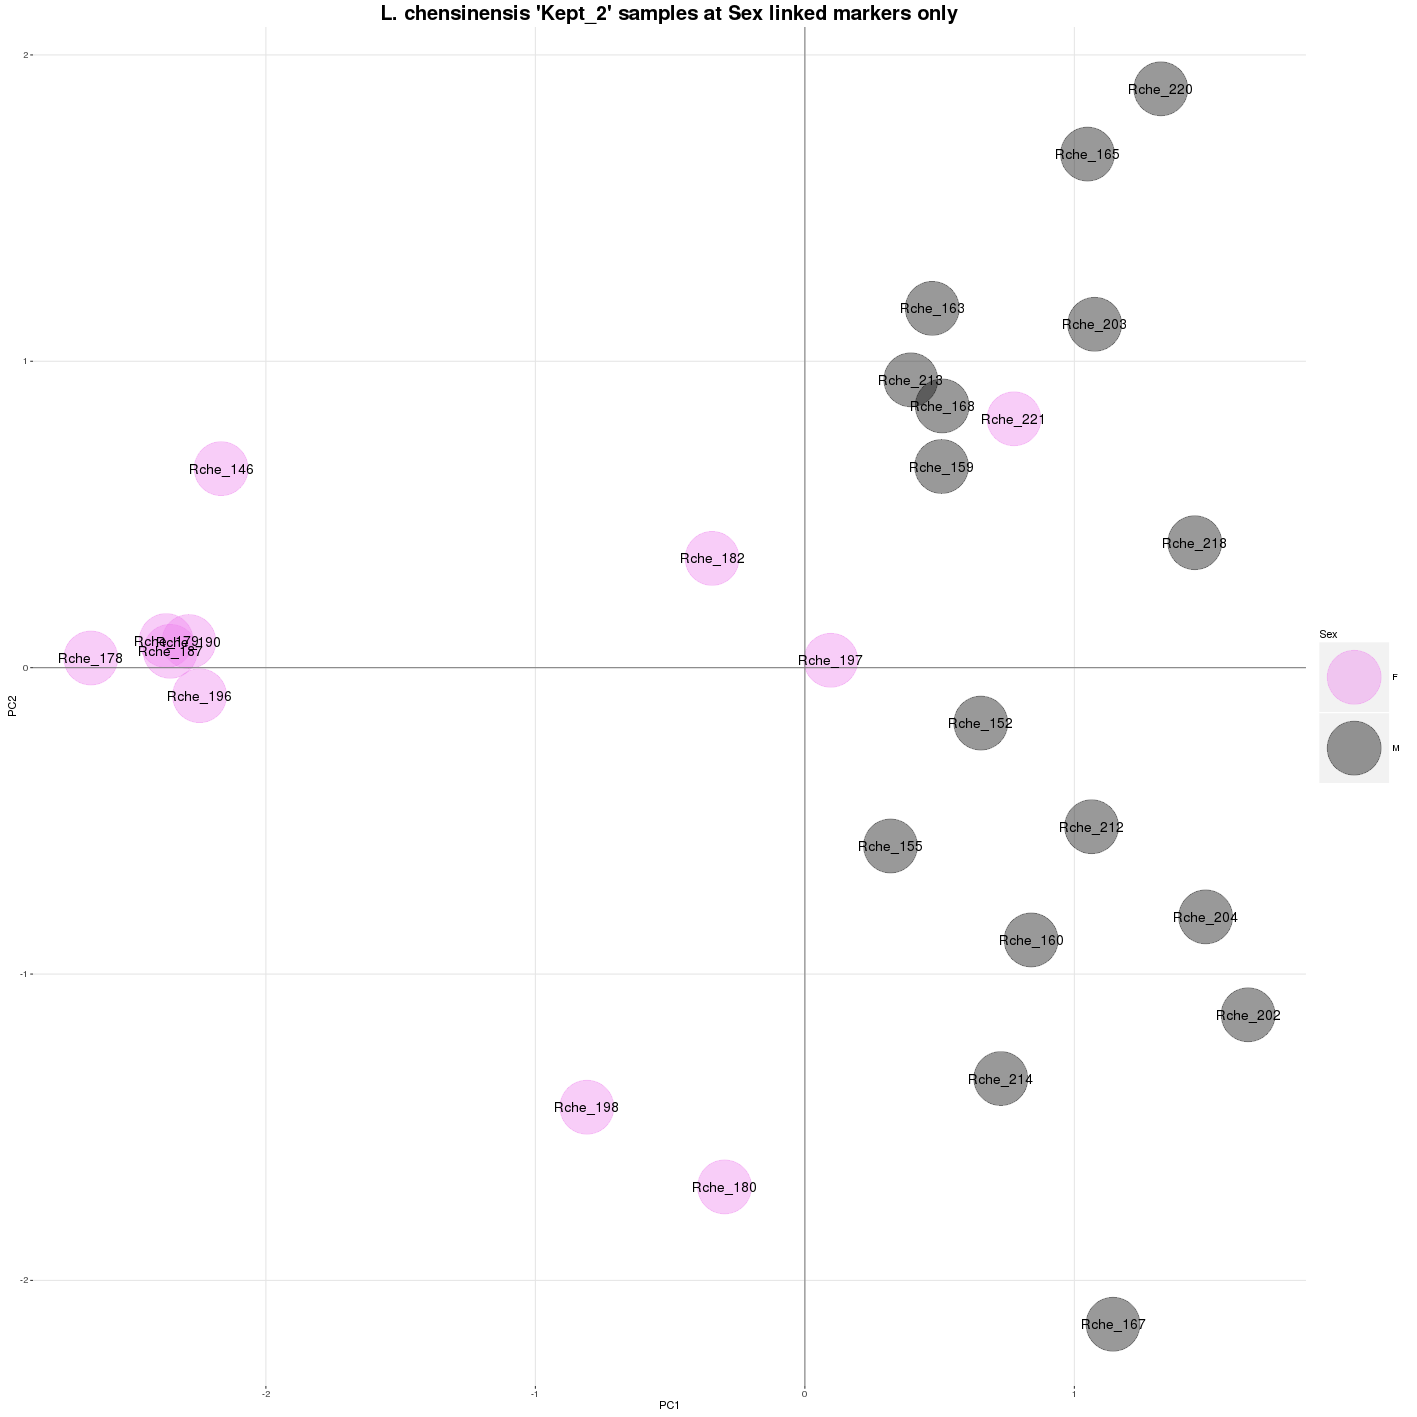

In [75]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca3,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. chensinensis 'Kept_2' samples at Sex linked markers only", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

It definitely looks to me that at least some of these females are wrongly sexed. However, again, this PCA approach is no validation. I need to see how these loci map to the genome. Only then will I have a good idea of how they cluster across linkage groups, which is the best means of validating really. But for now, I will stick with this set.

## Summary

This is a problematic dataset, with several issues relating to population structure in the data and also to the potential mis-assignment of sex in some samples. However I do have a subset of samples which, when used in the three standard for finding SL markers, identify a disproportionate number of putatively XY linked tags compared to ZW. This is a good sign. Validation is however needed in order to make sure that these are not false positives, for example, the remaining number of females is quite low, and as the Y specific marker test looks for loci absent in one sex, this low number of females increases the likelihood of a tag not being sequenced in females just by chance, not because it is not there. Although this is still unlikely for 6 females, it is not impossible. 


N tags in final dataset: 43041  
N SNPS in final dataset: 24356  

N ZW snps found: 14  
N XY tags found: 66  


In [5]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil

Rtemp_fasta = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa"
Rtemp_db = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2-blastn-db"

Nano_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta"
Nanorana_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_blast_db"

Xen_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xenoupus_blastdb"
Xen_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"


best_hit_crit = 1e-3
Eval_threshold = 1e-15
Window = 8000

wd = "/home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_chensinensis/"
prefix = "R_chen"

### Tags to Rtemp

print "\n##  Mapping tags to R. temporaria  ##\n"

tags ="%s/%s" % (wd, "R_chensinensis.fa")
tags_to_Rtemp_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "tags_Rtemp_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Rtemp_db, outfmt=5, out=tags_to_Rtemp_blastnouts)
stdout, stderr = blastn_cline()

Rtemp_records = MISC.BlastParseExtra(tags_to_Rtemp_blastnouts, Rtemp_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_blast_chunks = "%s/%s" % (wd,  "%s_%s" % (prefix, "Rtemp_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Rtemp_blast_chunks)


### Rtemp chunks to Nanorana

print "\n##  Mapping Rtemp chunks Nanorana  ##\n"

tags_Rtemp_Nano_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_blast_chunks, db=Nanorana_db, outfmt=5, out=tags_Rtemp_Nano_blastnouts)
stdout, stderr = blastn_cline()

Nano_records = MISC.BlastParseExtra(tags_Rtemp_Nano_blastnouts, Nano_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_Nano_blast_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Rtemp_Nano_blast_chunks)



### Nanorana chunks to Xenopus

print "\n##  Mapping Nanorana chunks Xenopus  ##\n"

tags_Rtemp_Nano_Xen_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_Xen_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_Nano_blast_chunks, db=Xen_db, outfmt=5, out=tags_Rtemp_Nano_Xen_blastnouts)
stdout, stderr = blastn_cline()

Xen_records = MISC.BlastParseExtra(tags_Rtemp_Nano_Xen_blastnouts, Xen_fasta , best_hit_crit, Eval_threshold,Window)

Xen_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_Xen_8kb_chunks.fa"))
                                      
shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Xen_chunks)



### Get the Xenopus summary

print "\n##  Final Xenopus hits  ##\n"

from collections import Counter 
Xen_hits = []
for i in Xen_records:
    Xen_hits.append(Xen_records[i]["Ref_hit_id"])
    print i, Xen_records[i]["Ref_hit_id"]


##  Mapping tags to R. temporaria  ##

Number of multi-alingments kept: 8
Number of unique alingments kept: 14
Getting subject scaffold segments from /home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa . . . 
22 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_chensinensis//blast_8000_chunks.fa

##  Mapping Rtemp chunks Nanorana  ##

Number of multi-alingments kept: 12
Number of unique alingments kept: 1
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta . . . 
13 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_chensinensis//blast_8000_chunks.fa

##  Mapping Nanorana chunks Xenopus  ##

Number of multi-alingments kept: 1
Number of unique alingments kept: 0
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_